# **Tasty Bytes - Predicting Recipe Site Traffic**

## Introduction
The product team at Tasty Bytes want our help with analysing and then predicting which recipes will be popular within their available catalogue. Picking a popular recipe to display on the homepage of the Tasty Bytes website can increase traffic to the rest of the website by up to 40%! The asks from the product team are to:
- Predict which recipes will lead to high traffic for the website.
- Correctly predict these high traffic recipes 80% of the time.

This notebook will walk through the project steps, from data validation and exploratory analysis through to model development, evaluation and then, crucially, model performance as it relates to the business criteria.

A Logistic Regression model was found to be the best performing by a thin margin, with a precision score of ~83%, and is the recommended model to implement currently. Interesting insights into the nature of popular recipes were also gleaned: pork, potato and vegetable recipes were comfortably the most popular to be displayed on the home page of the Tasty Bytes website, serving size had no real impact on popularity and neither did nutritional information such as number of calories, carbohydrates and protein per recipe.

Let's dive in!

## Data Validation
First things first, we need to take a look at the data that has been supplied to us. This data contains a snapshot of information about the recipes available to the product team and should contain 8 distinct columns.
1. recipe - a numeric column identifying each recipe
2. calories - a numeric column detailing the number of calories within a recipe
3. carbohydrate - a numeric column giving the weight of carbohydrates in the recipe, in grams
4. sugar - a numeric column giving the weight of sugar in the recipe, in grams
5. protein - a numeric column giving the weight of protein in the recipe, in grams
6. category - a categorical column detailing the type of recipe present from 10 possible options
7. servings - a numeric column providing the number of servings each recipe produces
8. high_traffic - a categorical column detailing whether traffic was high to the website when the recipe was shown on the homepage

We can load in this data via python and begin to check it over.

In [1]:
#import packages for data validation
import pandas as pd
import numpy as np

#read in recipe data
recipes = pd.read_csv('recipe_site_traffic_2212.csv')
#look at summary information on the dataframe
print(recipes.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 59.3+ KB
None


### 0. recipe
The recipe column seems to be in the form we want it, containing 947 unique integer numbers each corresponding to a different recipe. We should check whether there are any duplicated recipes within this dataset though.

In [2]:
#check for duplicates
print(f"{recipes.duplicated(subset='recipe').sum()} Duplicates")

0 Duplicates


No recipes are repeated here, so we can leave this column as is.

### 1. calories
The calories column is also numeric, this time in decimal form, but with missing values present in the column. What percentage of the column is composed of missing values?

In [3]:
#check percentage of missing values in calorie column
missing_percentage = round(100*recipes['calories'].isna().sum()/len(recipes),2)

#display missing percentage
print(f"Calorie Column Mising/Null Values: {missing_percentage}%")

Calorie Column Mising/Null Values: 5.49%


We have ~5.5% of our calories column being taken by missing/null values (52 rows), but what I've noticed is that all four of the nutritional columns have the same number of missing values! We should check the dataframe to see if there is a link here.

In [4]:
#check where values are missing
recipes[recipes['calories'].isna()]

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
23,24,NaN,NaN,NaN,NaN,Meat,2,NaN
48,49,NaN,NaN,NaN,NaN,Chicken Breast,4,NaN
82,83,NaN,NaN,NaN,NaN,Meat,4,High
89,90,NaN,NaN,NaN,NaN,Pork,6,High
116,117,NaN,NaN,NaN,NaN,Chicken Breast,6,High
121,122,NaN,NaN,NaN,NaN,Dessert,2,High
136,137,NaN,NaN,NaN,NaN,One Dish Meal,2,High
149,150,NaN,NaN,NaN,NaN,Potato,2,High
187,188,NaN,NaN,NaN,NaN,Pork,4,High


Every missing/null entry within the calories column is matched with missing values across carbohydrate, sugar and protein columns too! With this in mind, it makes sense to drop these rows where null values are present to avoid mass imputation across four of our columns.

In [5]:
#drop missing rows across nutritional information
recipes = recipes[~recipes['calories'].isna()]

#check the information on our dataframe
recipes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 895 entries, 1 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        895 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      895 non-null    object 
 6   servings      895 non-null    object 
 7   high_traffic  535 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 62.9+ KB


With these rows dropped, we can move onto the other columns!

### 2. carbohydrate
Thanks to our prior checks when validating the calories column, we don't need to do any further changes to the carbohydrate column as it is in numeric, decimal form as we want with no missing values now that we have removed the null values that were flagged in the process of cleaning the calories column.

### 3. sugar
Thanks to our prior checks when validating the calories column, we don't need to do any further changes to the sugar column as it is in numeric, decimal form as we want with no missing values now that we have removed the null values that were flagged in the process of cleaning the calories column.

### 4. protein
Thanks to our prior checks when validating the calories column, we don't need to do any further changes to the protein column as it is in numeric, decimal form as we want with no missing values now that we have removed the null values that were flagged in the process of cleaning the calories column.

### 5. category
The category column is currently present as a categorical column, which should have 10 possible entries. Let's check.

In [6]:
#check category column for possible entries
print(recipes['category'].value_counts().count())
recipes['category'].value_counts()

11


Breakfast         106
Chicken Breast     94
Beverages          92
Potato             83
Lunch/Snacks       82
Vegetable          78
Dessert            77
Meat               74
Pork               73
Chicken            69
One Dish Meal      67
Name: category, dtype: int64

We have 11 entries in this column, and we can see that there has been some overlap with the chicken recipes, with one entry for chicken and one entry for chicken breast. We can combine these into the expected Chicken category.

In [7]:
#update category column
recipes['category'].replace('Chicken Breast','Chicken',inplace=True)
#cast category column as category
recipes['category'] = recipes['category'].astype('category')
#check entries within category column
recipes['category'].value_counts()

Chicken          163
Breakfast        106
Beverages         92
Potato            83
Lunch/Snacks      82
Vegetable         78
Dessert           77
Meat              74
Pork              73
One Dish Meal     67
Name: category, dtype: int64

### 6. servings

The vast majority of entries are numbers in string form, apart from three entries with text in them about snacks! We can combine these entries with their respective numerical points; '4 as a snack' with '4' and '6 as a snack' with '6', and then convert the remaining entries into integers to satisfy the numeric condition for the column.

In [8]:
#update servings row to string form and then remove 'as a snack' section
recipes['servings'] = recipes['servings'].astype('str')
recipes['servings'] = recipes['servings'].str.replace(' as a snack','')

#update servings column as integer type
recipes['servings'] = recipes['servings'].astype('int64')

print(recipes.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 895 entries, 1 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   recipe        895 non-null    int64   
 1   calories      895 non-null    float64 
 2   carbohydrate  895 non-null    float64 
 3   sugar         895 non-null    float64 
 4   protein       895 non-null    float64 
 5   category      895 non-null    category
 6   servings      895 non-null    int64   
 7   high_traffic  535 non-null    object  
dtypes: category(1), float64(4), int64(2), object(1)
memory usage: 57.2+ KB
None


### 7. high_traffic
This is expected as a categorical column, with a 'High' marker if traffic was high to the website. This is present within the column but it leaves us with null values in the column too! To counteract this, the column will be transformed into a boolean form, using 'True' to represent High and 'False' to represent the null values, which are assumed to correspond to a recipe that doesn't drive high traffic to the website.

In [9]:
#converting high_traffic column to boolean form
recipes['high_traffic'] = np.where(recipes['high_traffic']=='High','True','False')

#convert to category
recipes['high_traffic'] = recipes['high_traffic'].astype('category')

#check values within high_traffic column
recipes['high_traffic'].value_counts()

True     535
False    360
Name: high_traffic, dtype: int64

Checking through the information about the dataframe, we can see that the data has been validated and cleaned into the desired form!

In [10]:
print(recipes.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 895 entries, 1 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   recipe        895 non-null    int64   
 1   calories      895 non-null    float64 
 2   carbohydrate  895 non-null    float64 
 3   sugar         895 non-null    float64 
 4   protein       895 non-null    float64 
 5   category      895 non-null    category
 6   servings      895 non-null    int64   
 7   high_traffic  895 non-null    category
dtypes: category(2), float64(4), int64(2)
memory usage: 51.2 KB
None


## Exploratory Analysis
With our data cleaned for the moment, we can begin to explore connections that may be present within the data. The business purpose for this exercise is to be able to accurately deduce (~80% accuracy) which recipes are popular and driving high traffic to the rest of the Tasty Bytes website. To start off with, let us examine the distribution of each recipe type within the dataset.

### Single Variable Analysis

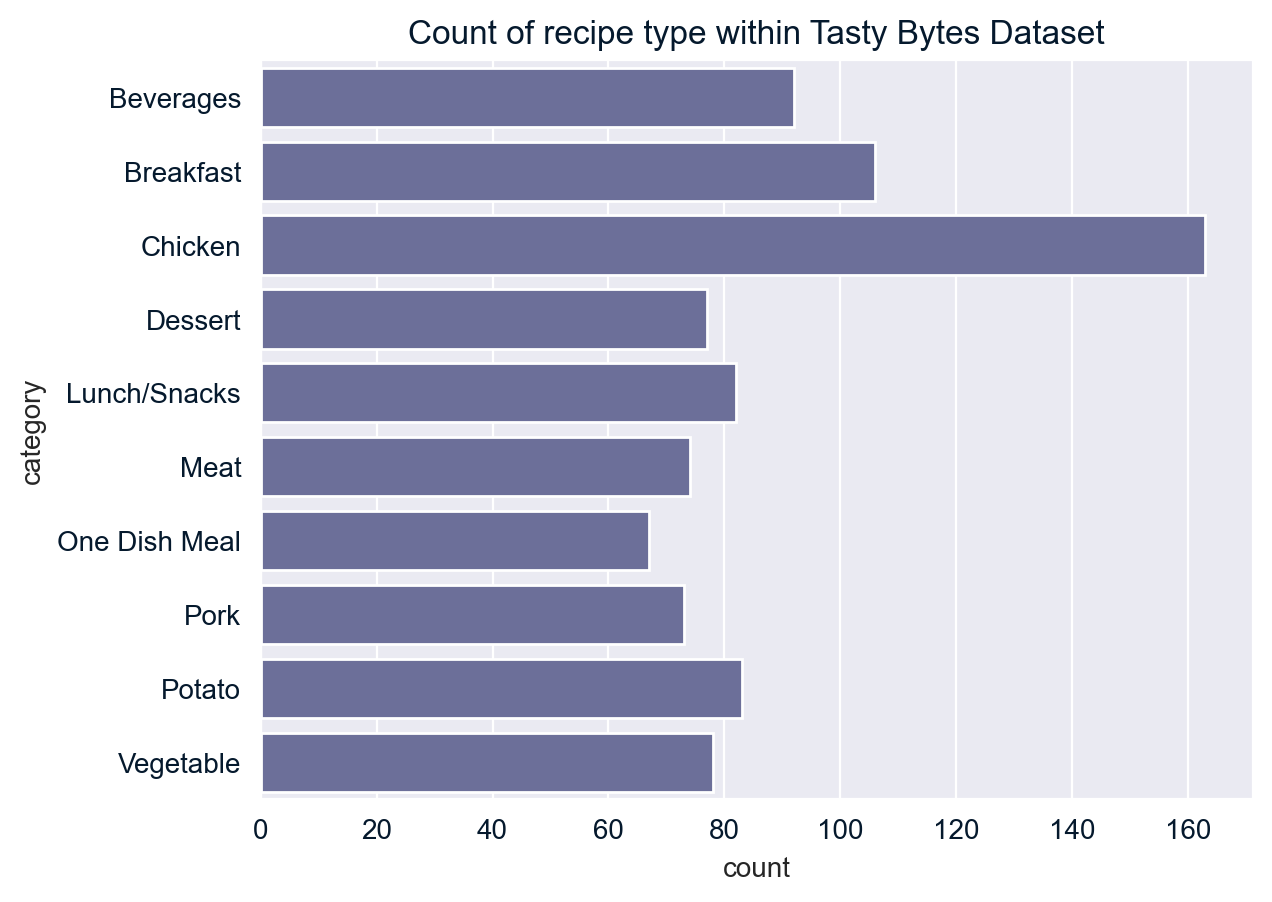

In [11]:
#import plotting functionality
import seaborn as sns
import matplotlib.pyplot as plt

#set style for plots
sns.set_style('darkgrid')
sns.color_palette('CMRmap')

#countplot showing the number of recipes of each category in the dataset
sns.countplot(recipes['category'])
plt.title('Count of recipe type within Tasty Bytes Dataset')
plt.show()

Chicken recipes are comfortably the largest proportion of recipes, with the other nine categories on a relatively even footing ranging from 60 to 100. This could be because chicken recipes are seen as easier/less time consuming to prepare, in which case it may be reflected in the high traffic count. There is a good spread of meal types within this dataset, now we can check the spread of data across the numeric columns utilising histograms.

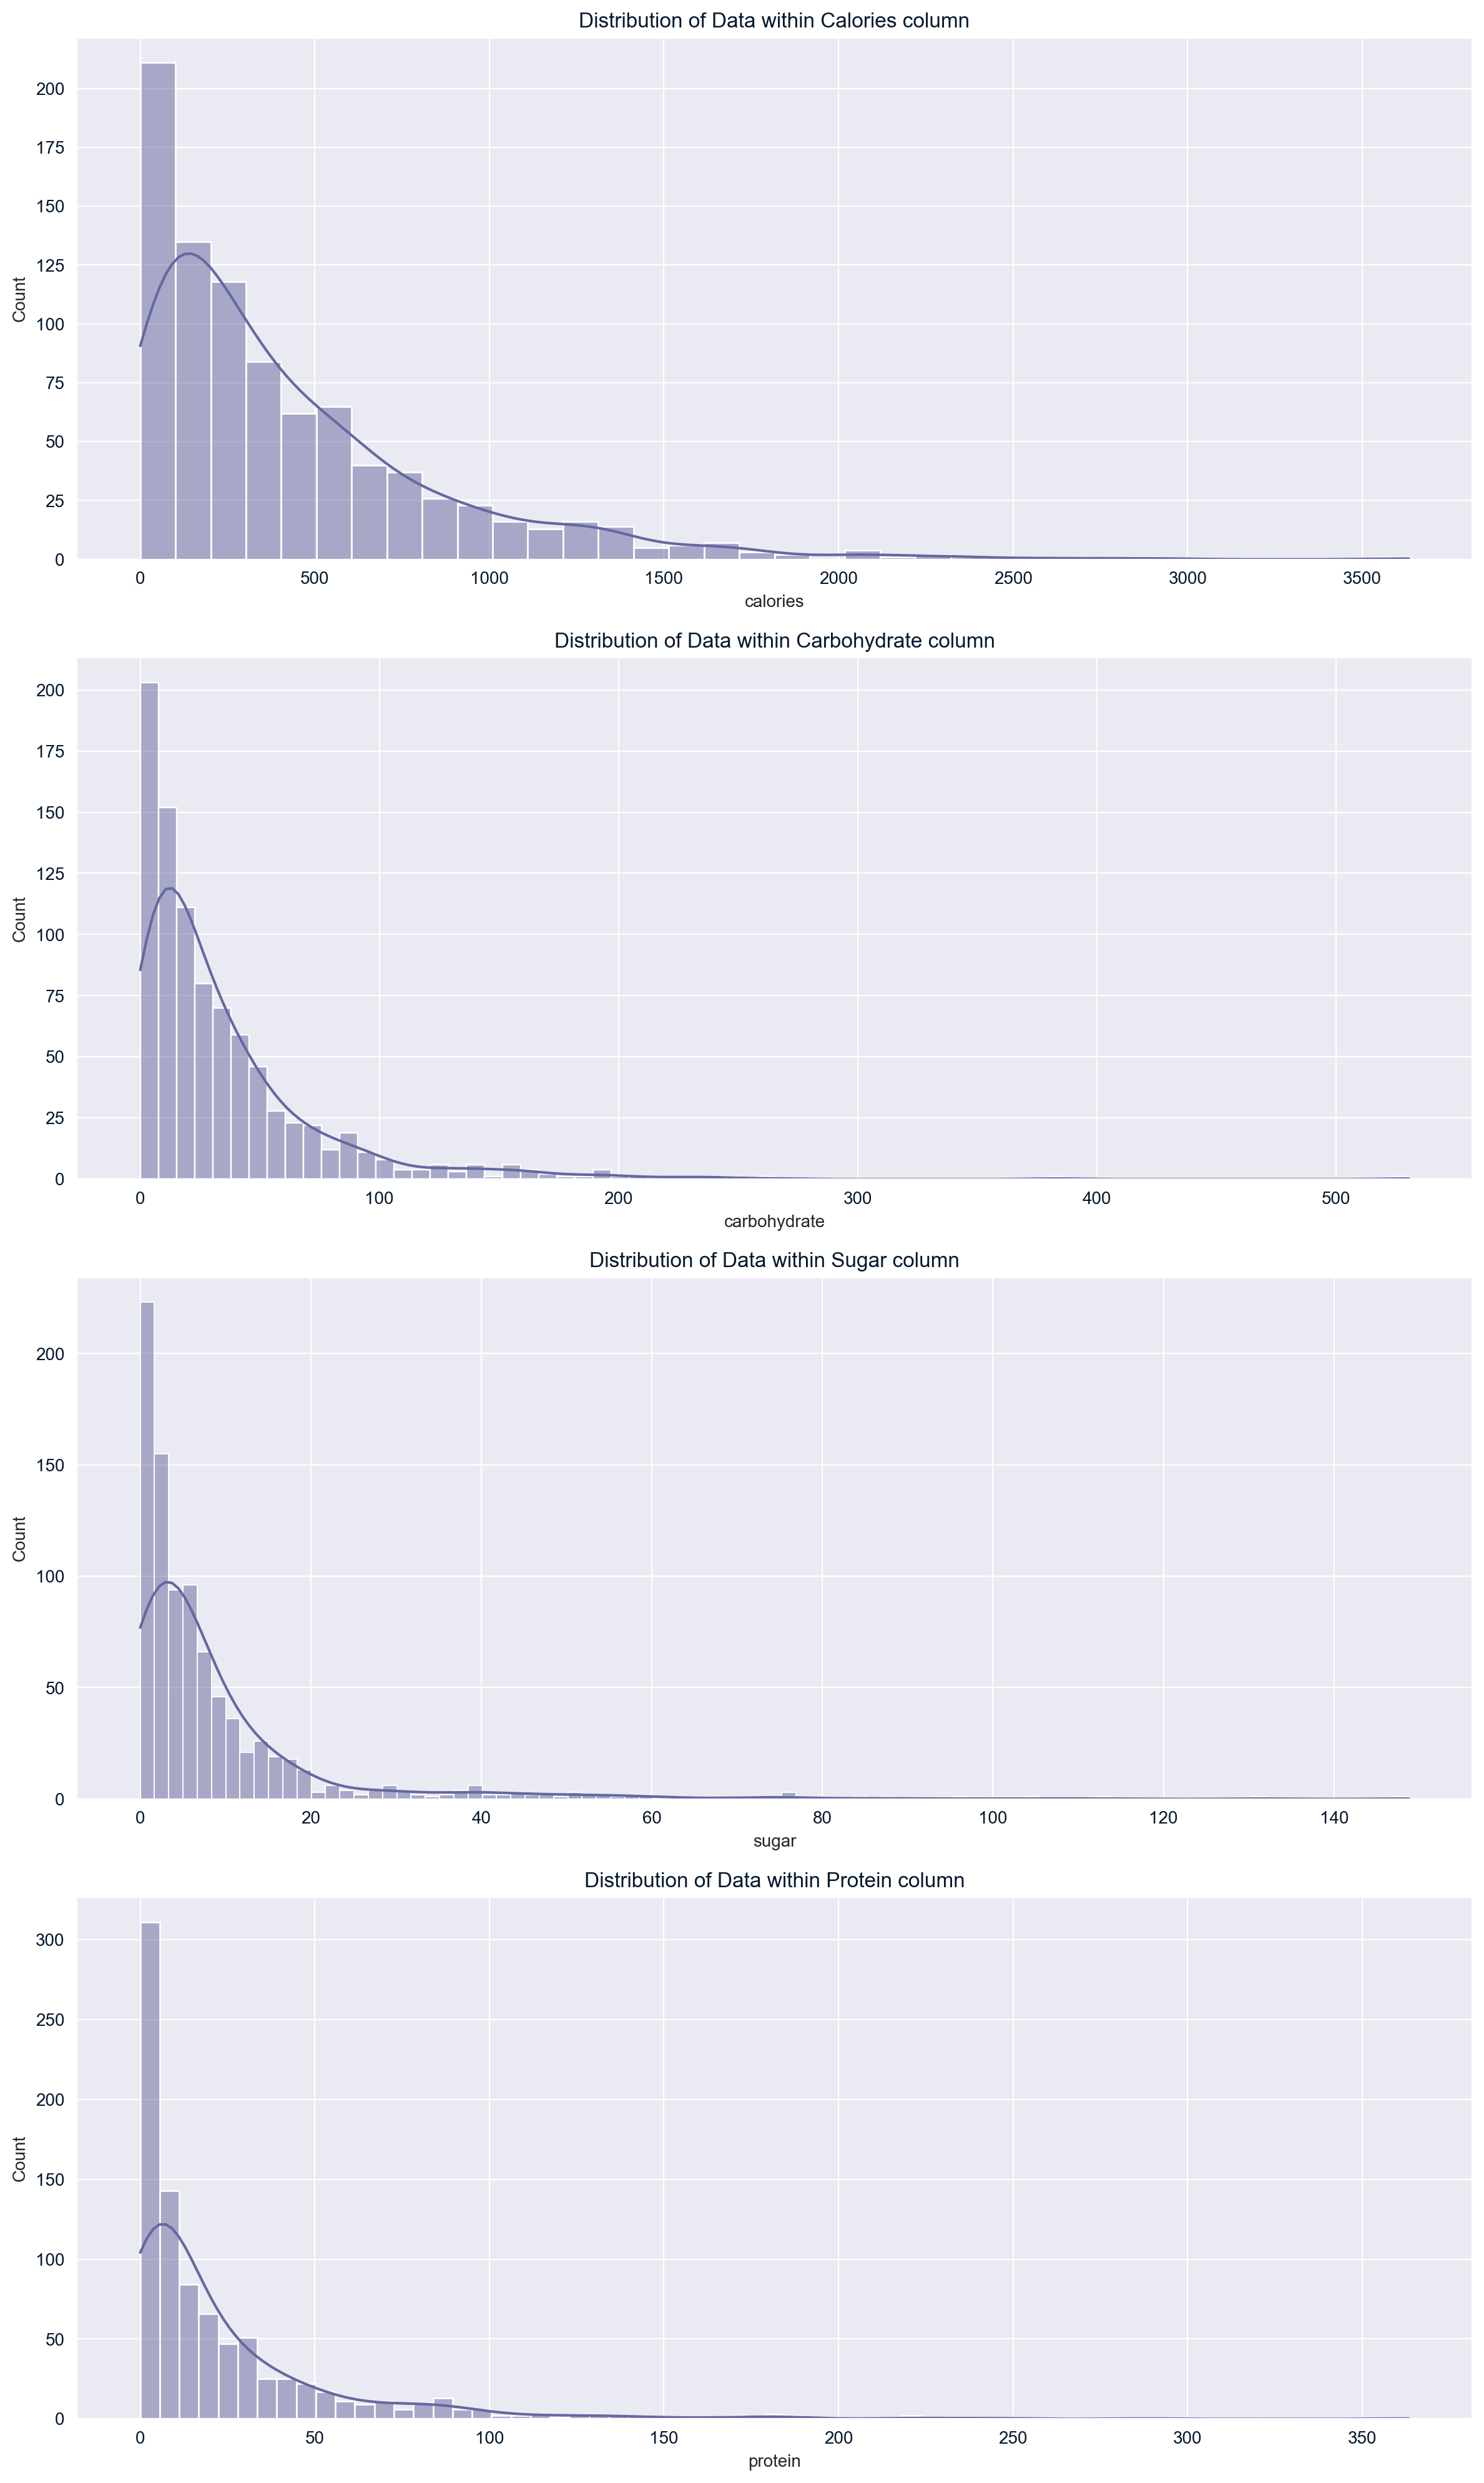

In [12]:
#histogram for float columns
float_columns = recipes.select_dtypes(include='float').columns
#number of rows for plot
row_num = len(float_columns)

#set up figures and axes for subsequent plots
fig, axes = plt.subplots(row_num,1,figsize = (12,5*row_num))

#iterate over columns for histograms
for i,col in enumerate(float_columns):
    ax = axes[i] if row_num > 1 else axes
    sns.histplot(data=recipes,x=col,kde=True,ax=ax)
    ax.set_title(f"Distribution of Data within {col.capitalize()} column")

#adjust for spacing between plots and display
plt.tight_layout()
plt.show()

Looking at the distribution of the data across our numerical columns, we can see a right-tailed distribution for all four, and so an approach involving the median and inter-quartile range for outlier calculation should be applied instead of utilising the mean and standard deviation. Mean and standard deviation are susceptible to influence by outliers within a dataset and tend to be used when the data approximates a normal distribution. Median and inter-quartile range can better ignore these outliers and provide a more representative measure of central tendency and spread respectively. We will come onto outlier calculation within the model development section of this report.

### Multi-Variable Analysis

We've looked at individual variables here, now let's see how they are related. Grouping by category and finding the median numerical values would be a good place to start.

<Figure size 640x480 with 0 Axes>

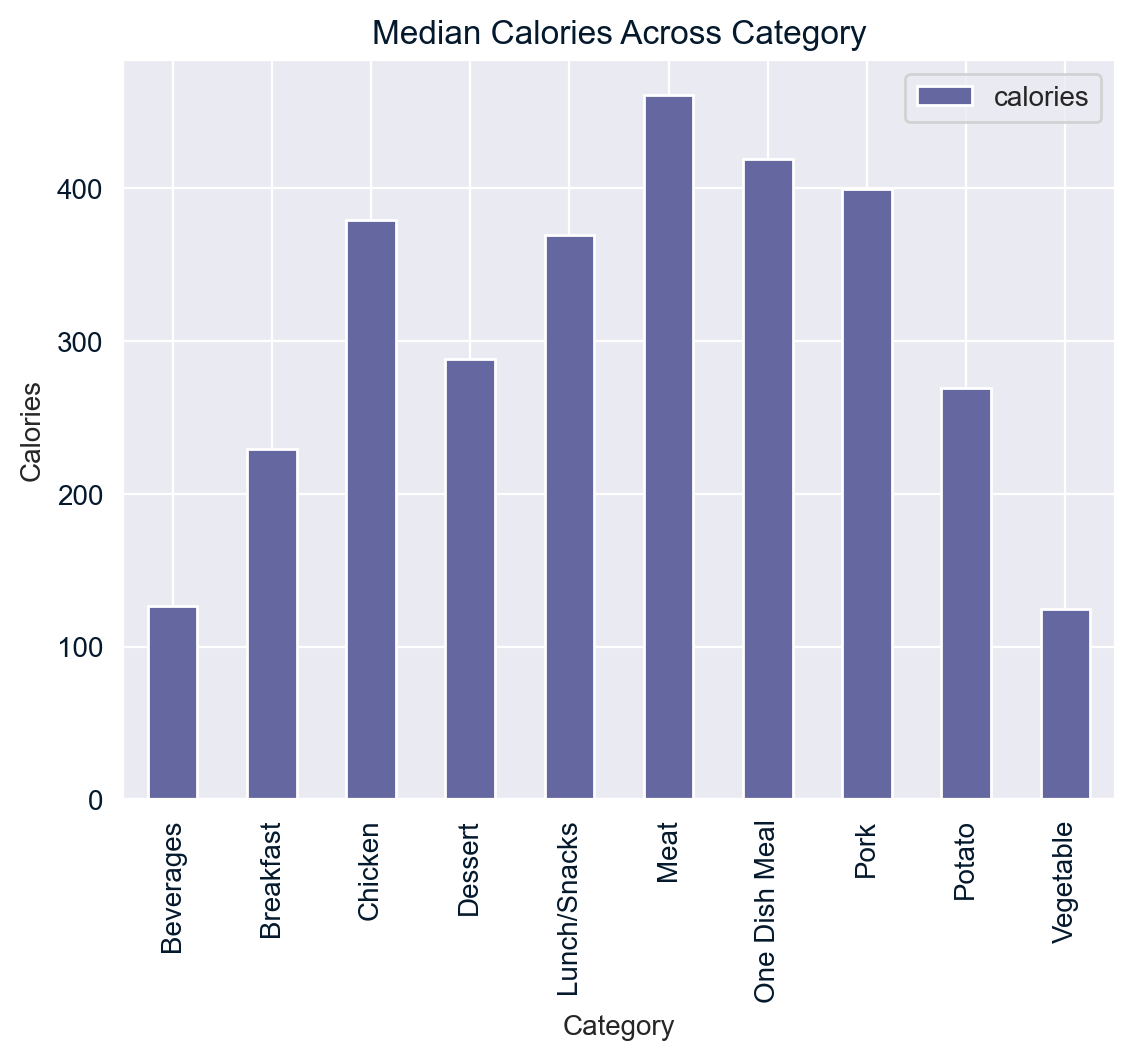

<Figure size 640x480 with 0 Axes>

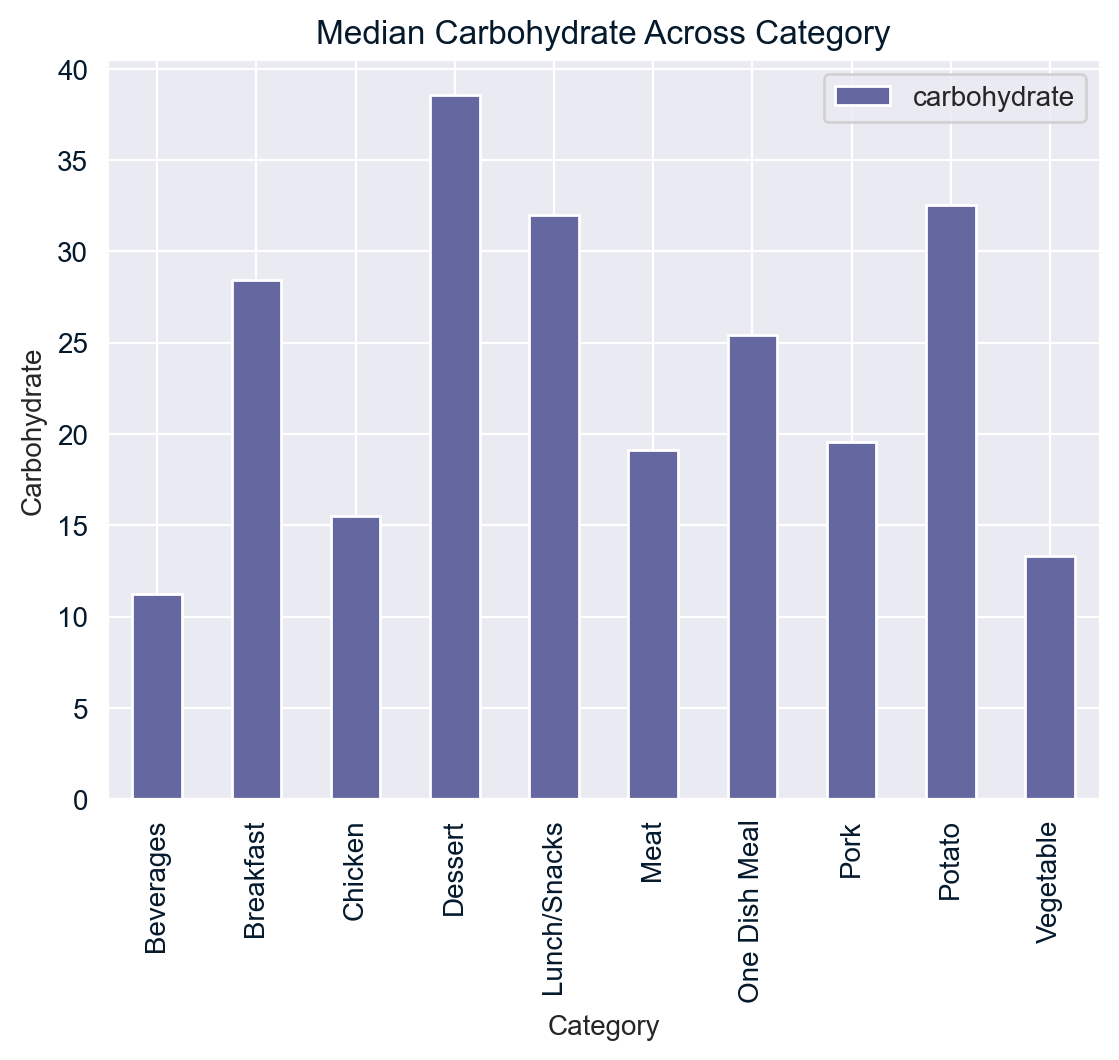

<Figure size 640x480 with 0 Axes>

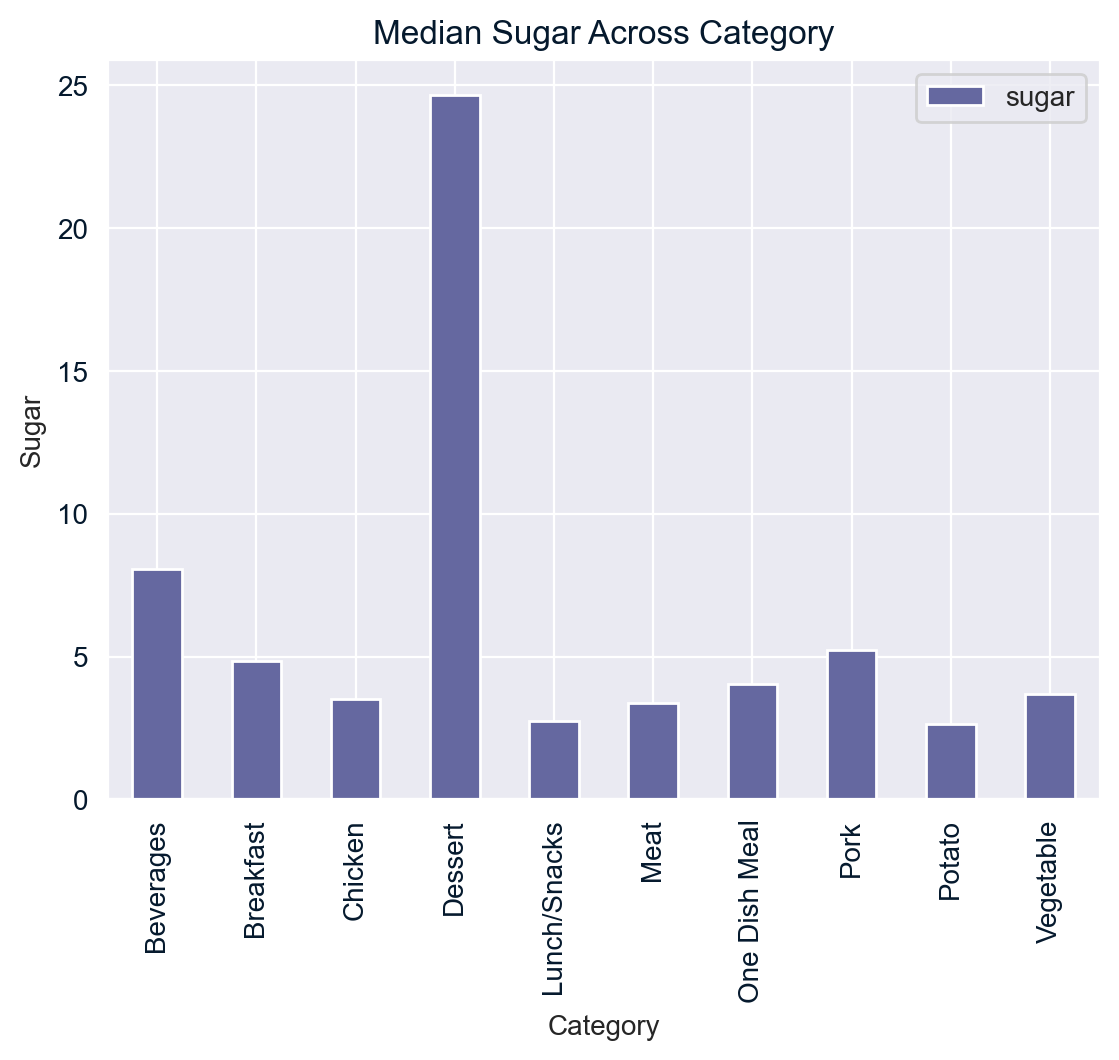

<Figure size 640x480 with 0 Axes>

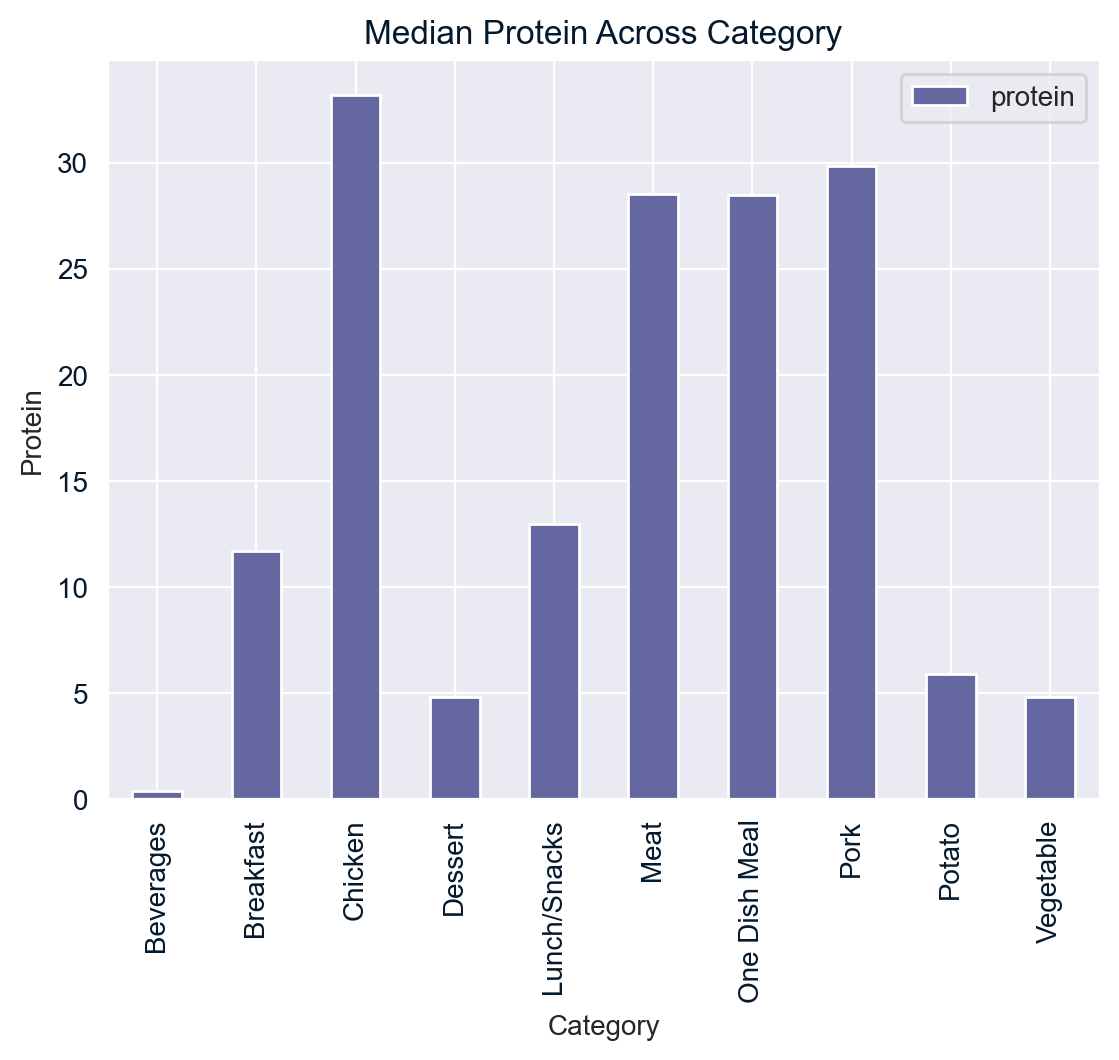

In [13]:
#group by category
median_by_category = recipes.groupby('category')[float_columns].median().reset_index()

#plot out the median values for each category across each food group
for col in float_columns:
    #create the plot
    plt.figure()
    median_by_category.plot(kind='bar',x='category',y=col)
    
    #add labels
    plt.xlabel('Category')
    plt.ylabel(f"{col.capitalize()}")
    plt.title(f"Median {col.capitalize()} Across Category")

#show the plots
plt.show()

The medians across each category and nutritional type are not symmetrical, with lots of variance across categories and between food groups. Protein sees spikes across the meat dishes (Chicken, Meat, Pork) as you would expect along with One Dish Meals, likely to contain some form of protein or meat. Conversely, Carbohydrate sees the highest values across meals without a specific emphasis on some form of meat (Breakfast, Potato, Dessert) with One Dish Meal appearing as well, pointing towards a well-rounded approach to the recipes used within One Dish Meals! Sugar is topped by dessert by a long margin, but these peak values across the food groups do not map directly onto a higher calorie value, with protein being the closest approximation.

Coming back to the business objective in this assignment, we should compare what drives high and low traffic to the Tasty Bytes website, using the different categories and servings for each recipe. First, we can look at the different categories.

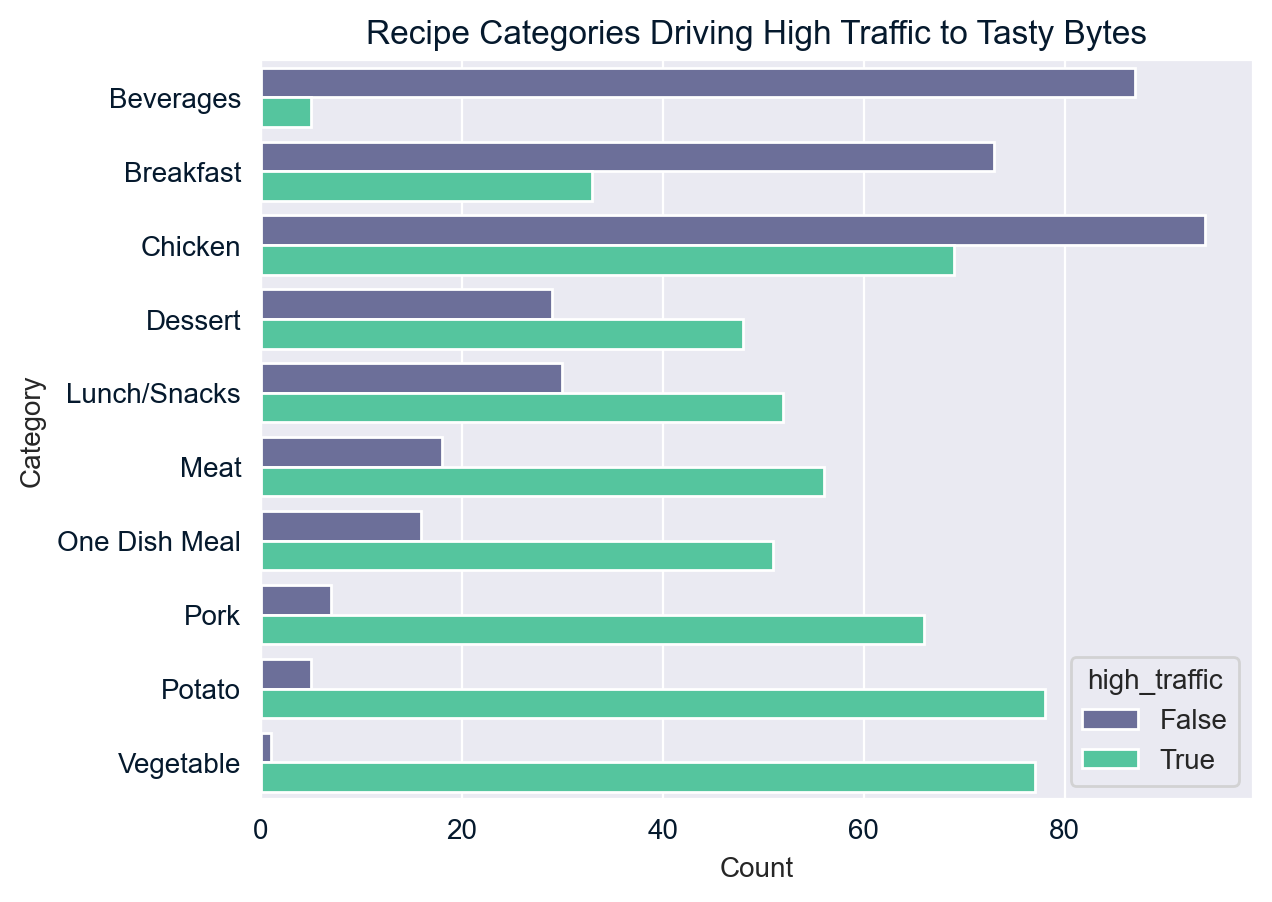

In [14]:
#Compare categories to see what drives high traffic to Tasty Bytes
sns.countplot(data=recipes,y='category',hue='high_traffic')
plt.ylabel('Category')
plt.xlabel('Count')
plt.title('Recipe Categories Driving High Traffic to Tasty Bytes')
plt.show()

Interesting information to be gleaned here! Beverages and Breakfast recipes seem to be much less popular where Vegetable, Potato and Pork recipes have a large number of High traffic flags. We should check the normalised values for each category to see what the proportional popularity is.

In [15]:
#pivot table with categories
categories_table = recipes.pivot_table(index='category',columns='high_traffic',values='recipe',aggfunc='count')
#normalise table for proportional values
norm_categories_table = categories_table.div(categories_table.sum(axis=1),axis=0)

#look at produced pivot table
print(norm_categories_table)

high_traffic      False      True
category                         
Beverages      0.945652  0.054348
Breakfast      0.688679  0.311321
Chicken        0.576687  0.423313
Dessert        0.376623  0.623377
Lunch/Snacks   0.365854  0.634146
Meat           0.243243  0.756757
One Dish Meal  0.238806  0.761194
Pork           0.095890  0.904110
Potato         0.060241  0.939759
Vegetable      0.012821  0.987179


This proportional look confirms what we supposed based on the count plot; that Vegetable, Potato, and Pork recipes have the highest proportion of High traffic responses. Beverages and Breakfast recipes seem much more unpopular! Interestingly, while on a magnitude basis Chicken recipes have the third highest High traffic responses, on a proportional level they are the third lowest category.

Now to look at the breakdown of servings by traffic flag!

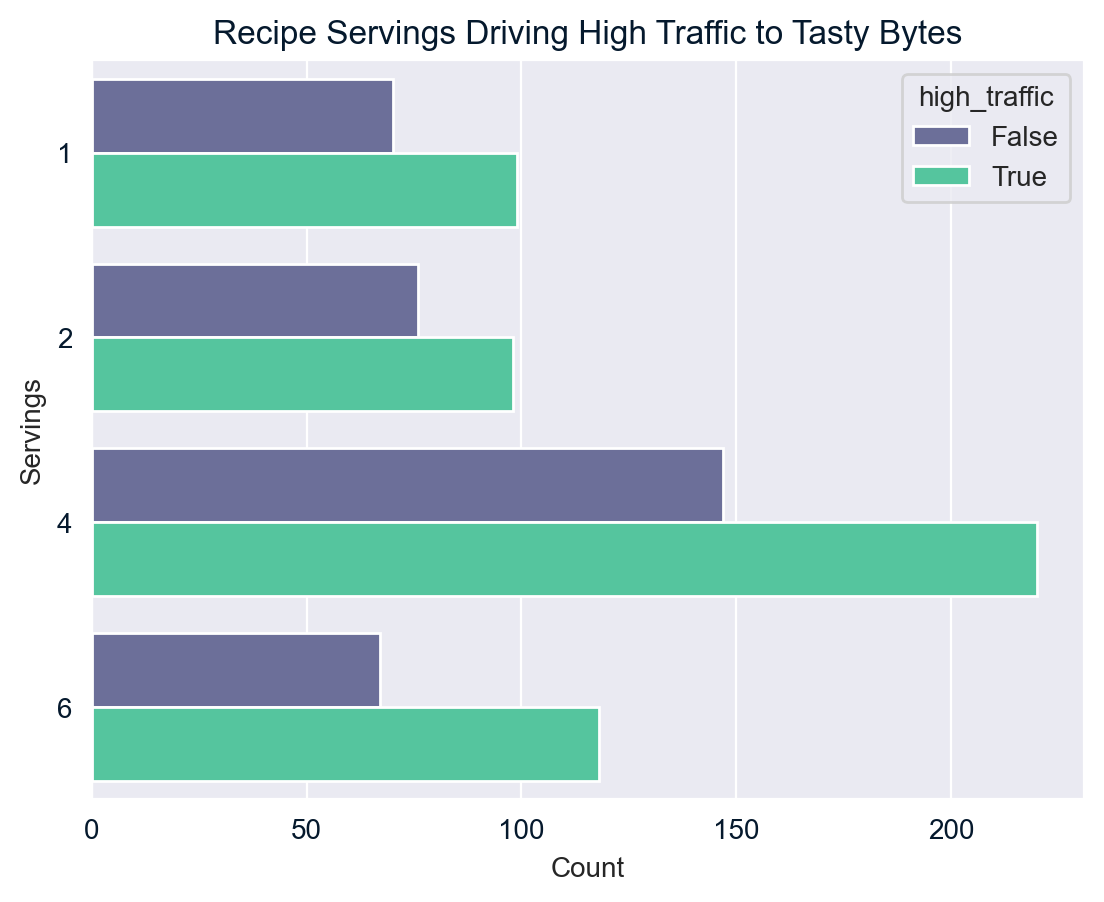

In [16]:
#Compare servings to see what drives high traffic to Tasty Bytes
sns.countplot(data=recipes,y='servings',hue='high_traffic')
plt.ylabel('Servings')
plt.xlabel('Count')
plt.title('Recipe Servings Driving High Traffic to Tasty Bytes')
plt.show()

On a magnitude level, 4 servings and 6 servings are the most popular recipes, with 4 comfortably largest. 1 and 2 servings are at a similar level of popularity to each other, behind 4 and 6. How does that translate into a proportional view?

In [17]:
#pivot table with categories
servings_table = recipes.pivot_table(index='servings',columns='high_traffic',values='recipe',aggfunc='count')
#normalise table for proportional values
norm_servings_table = servings_table.div(servings_table.sum(axis=1),axis=0)

#look at produced pivot table
print(norm_servings_table)

high_traffic     False      True
servings                        
1             0.414201  0.585799
2             0.436782  0.563218
4             0.400545  0.599455
6             0.362162  0.637838


Proportionally, we see that 6 servings is the highest in popularity for driving traffic to Tasty Bytes. However the difference between the highest and lowest proportion is only ~7%, so perhaps there is not too much of a link between the serving portions per recipe and the traffic driven to the Tasty Bytes website.

Before we begin modelling, we should check if there is any correlation between features within this dataset that we should be concerned about. Links between data would point to multi-colinearity - one feature of a dataset predicting another feature of the same dataset - which would need to be dealt with. We will cover multi-colinearity in more depth within our final data pre-processing steps before we begin to model.

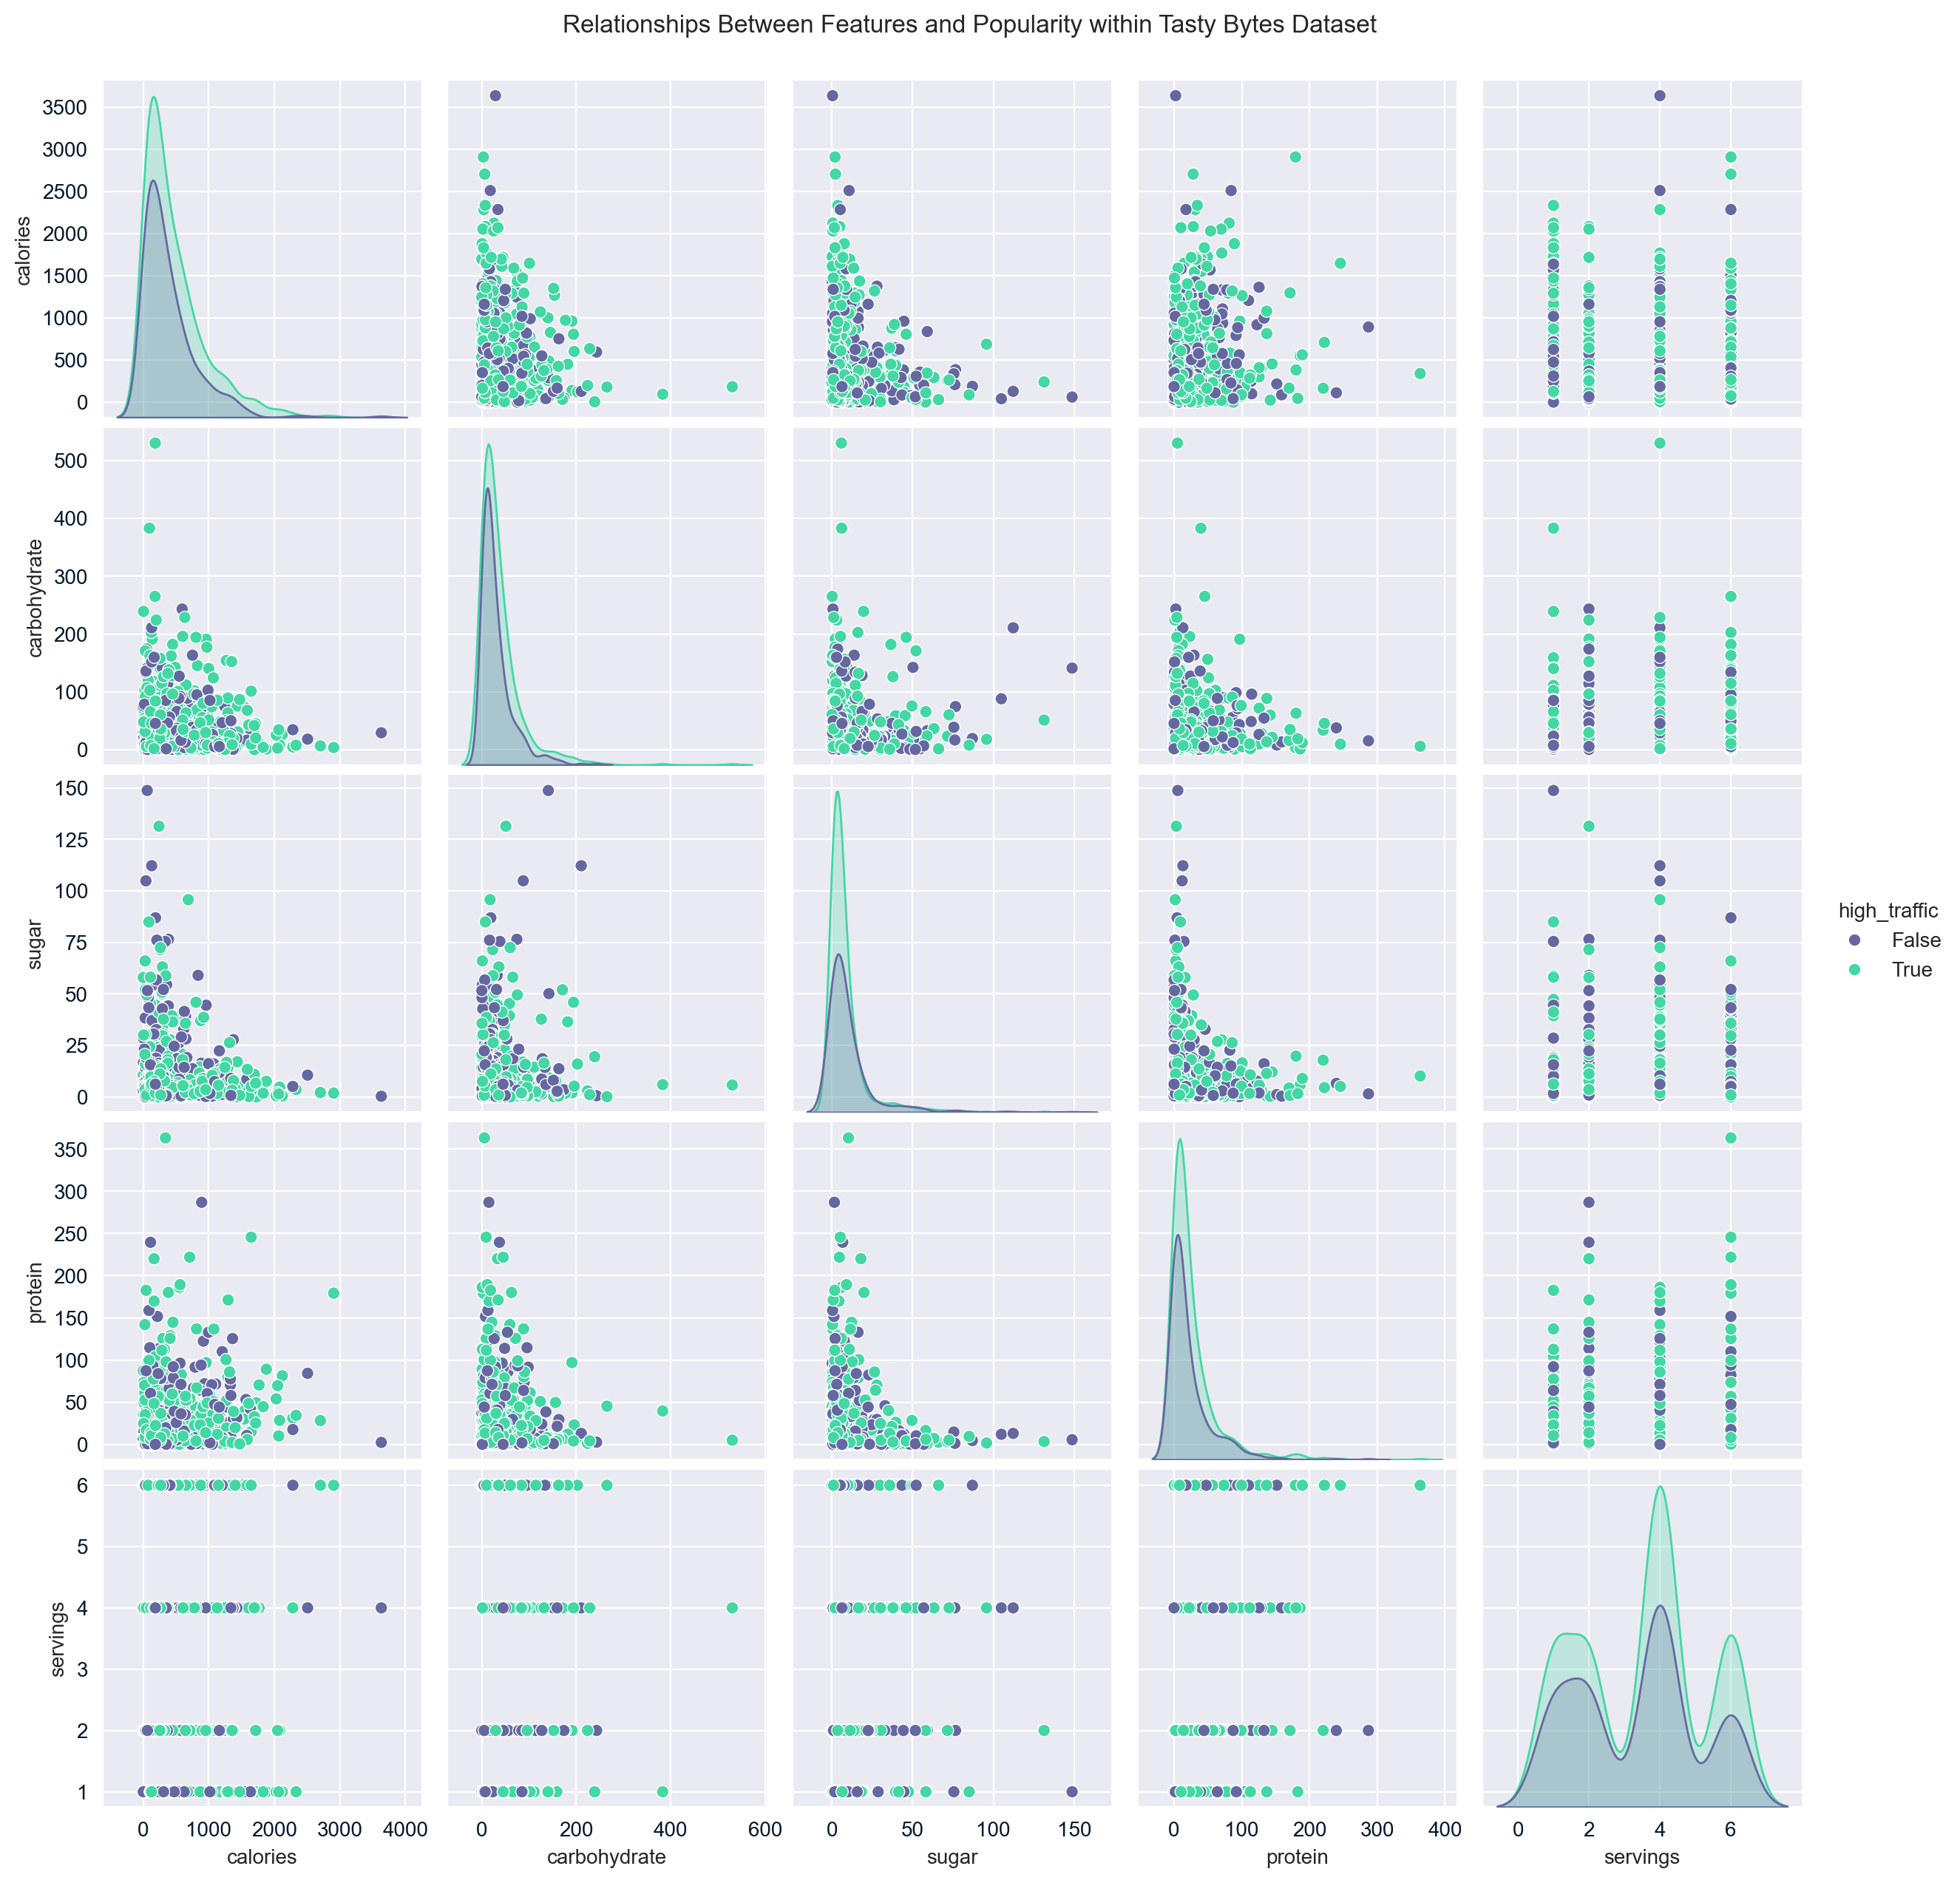

In [18]:
#pairplot of numeric features within dataset
interested_columns = ['calories', 'carbohydrate', 'sugar', 'protein', 'category', 'servings', 'high_traffic']
#create figure object to enable title addition
g = sns.pairplot(recipes[interested_columns],hue='high_traffic')
#add title
g.fig.suptitle('Relationships Between Features and Popularity within Tasty Bytes Dataset',y=1.02)
#show plot
plt.show()

Here we can see that there is no strong correlation between any of the features within our dataset and the high traffic flag that says whether a recipe is popular or not.

# Model Development

The product department at Tasty Bytes want a model able to predict which recipes will and won't drive high traffic to the main website. This is a quintessential binary classification problem; we need our model to predict whether a recipe is high traffic or not based on the dataset that we have been supplied. Before we begin to consider what we should choose for our binary classification model, there is some data preprocessing that needs to be done to turn that existing dataset into one that can be ingested properly for modelling and predicting.

## Data Pre-processing

One thing to consider with our data is the presence of outliers. We saw earlier that for each of Calories, Carbohydrate, Protein and Sugar, the data skewed into a right tailed distribution. Plotting box plots for each of these variables will demonstrate this skew well.

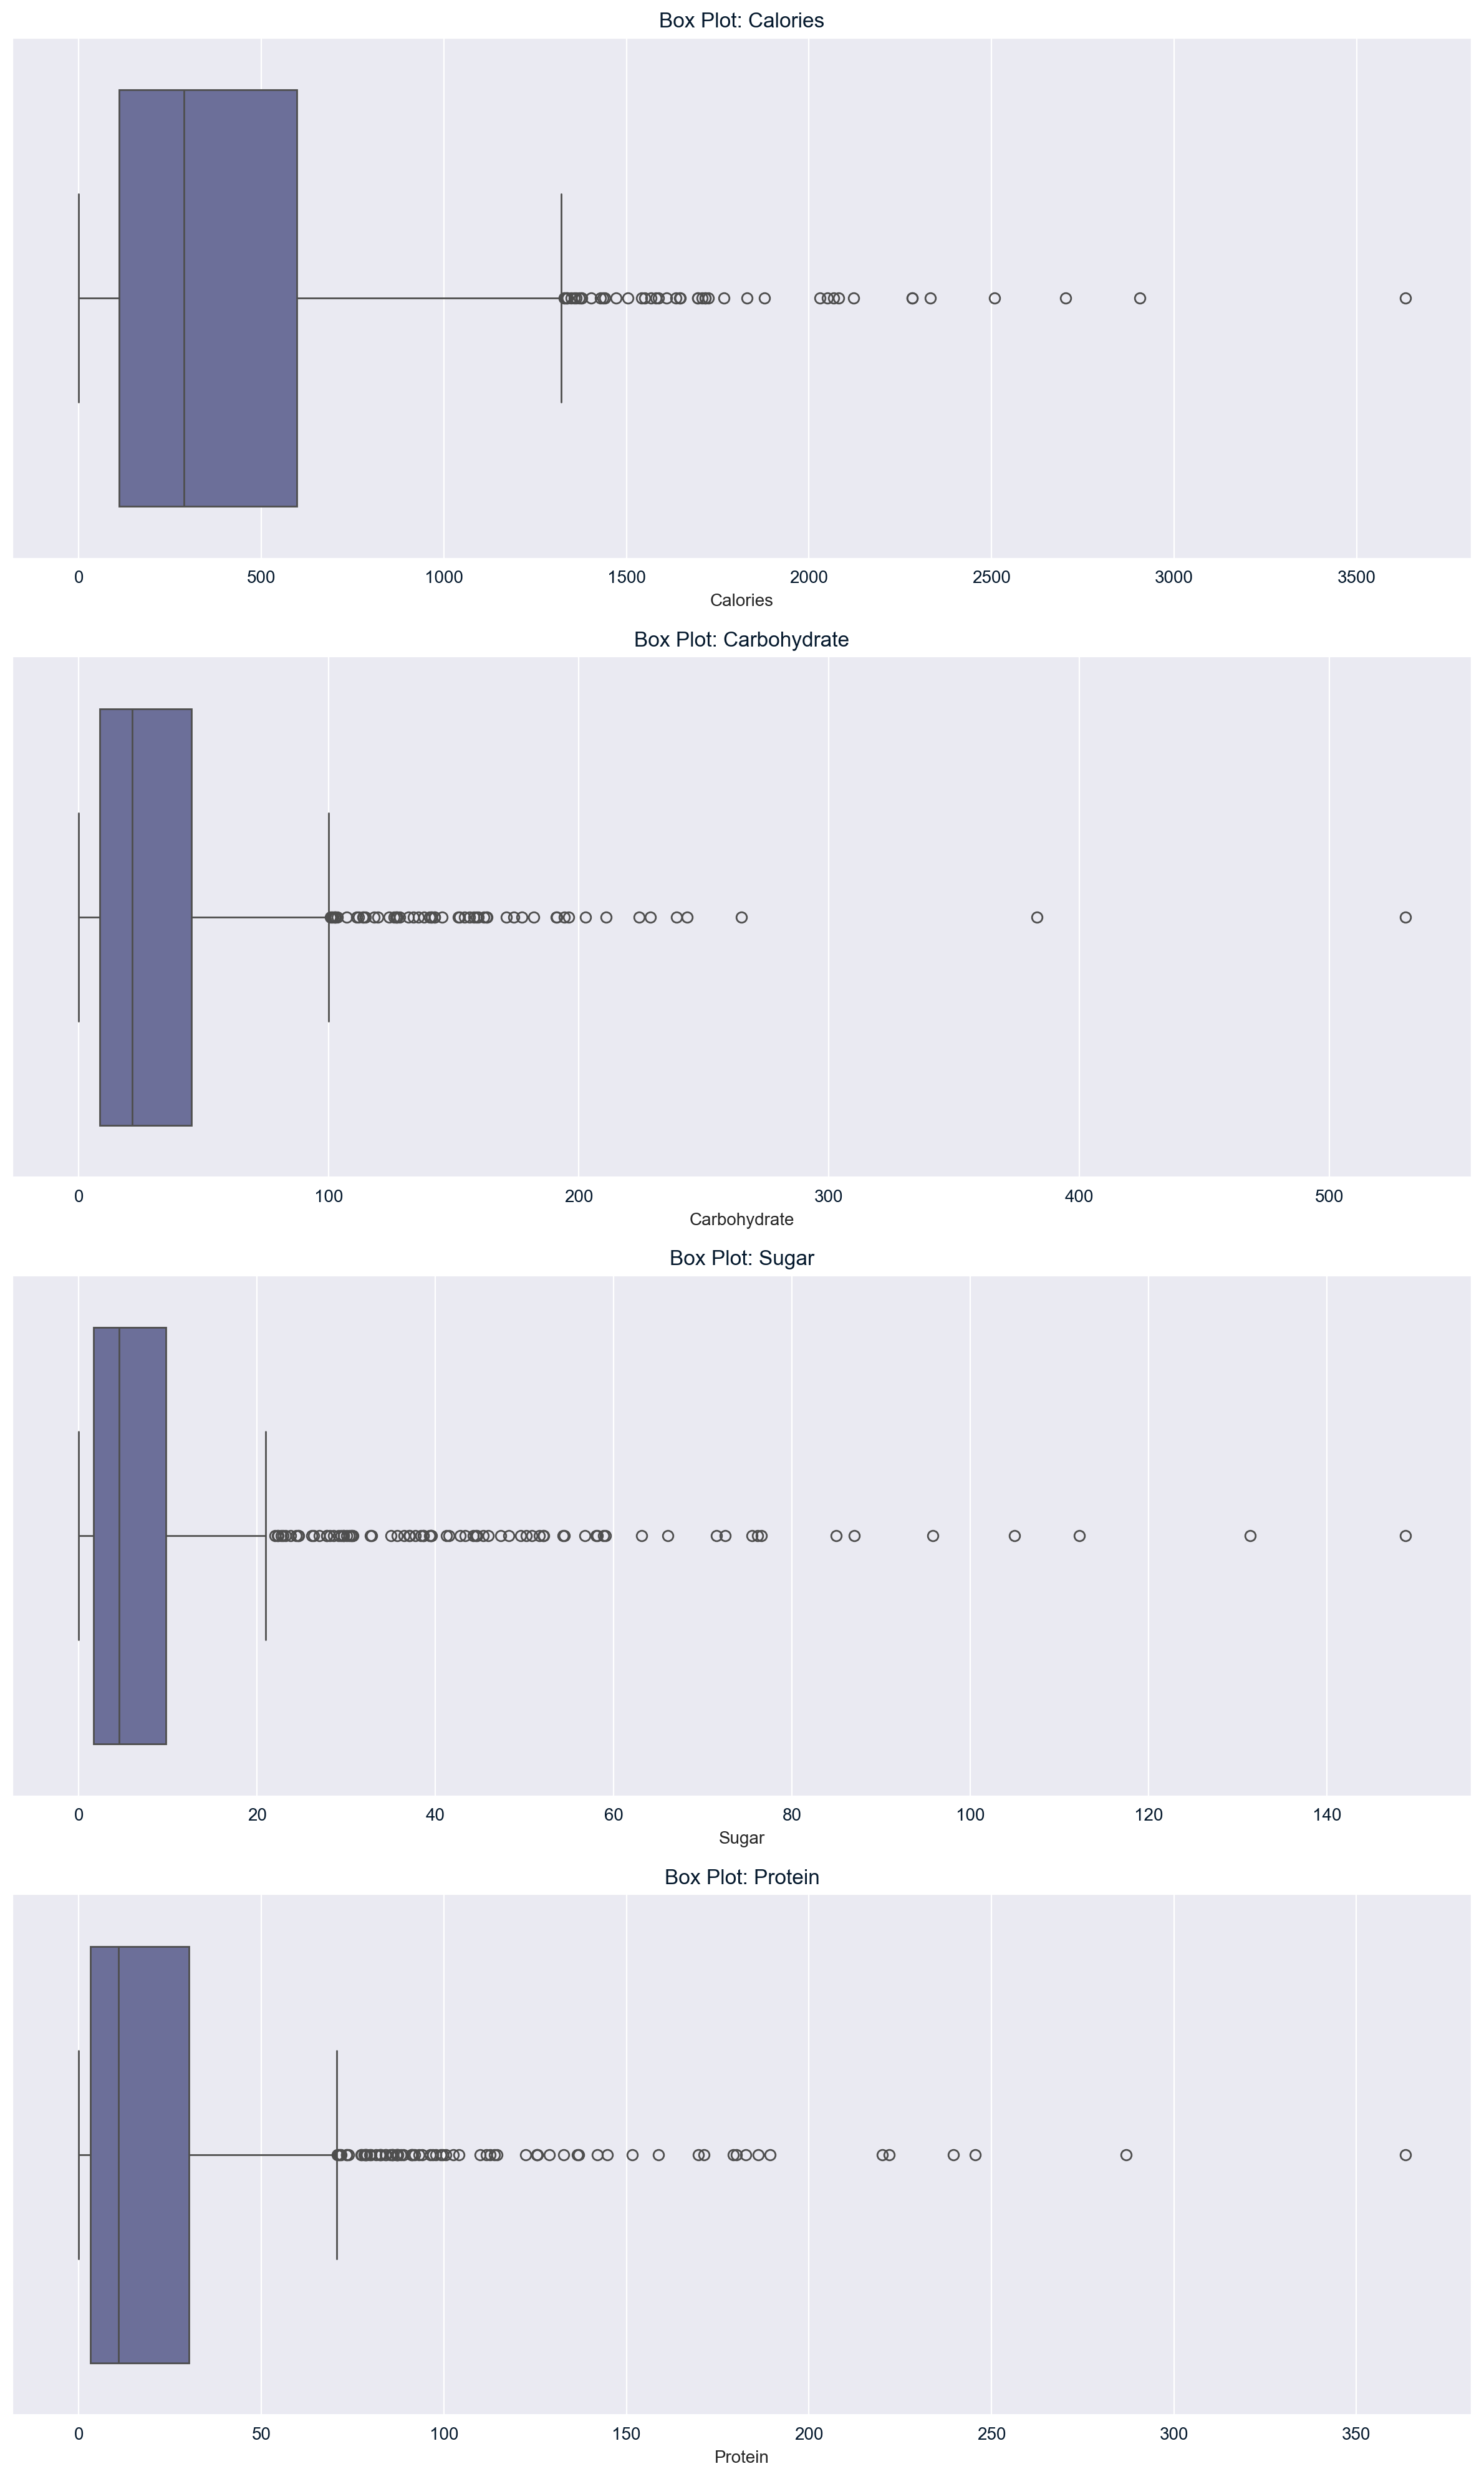

In [19]:
#define float columns
float_columns = recipes.select_dtypes(include='float').columns

#number of rows for plotting subplots
row_num = len(float_columns)

#set up figures and axes for subsequent plots
fig_box, axes_box = plt.subplots(row_num,1,figsize = (12,5*row_num))

#iterate over columns for histograms
for i,col in enumerate(float_columns):
    ax = axes_box[i] if row_num > 1 else axes_box
    sns.boxplot(data=recipes,x=col,ax=ax)
    ax.set_title(f"Box Plot: {col.capitalize()}")
    ax.set_xlabel(f"{col.capitalize()}")

#adjust for spacing between plots and display
plt.tight_layout()
plt.show()

The whiskers of each box plot are at the 95th percentile and 5th percentile respectively. We can see that quite a few data points in each category fall outside of these bounds, so we need to deal with these outliers. Removal would be suboptimal, leading to a high degree of data loss. Let's see what the lower and upper bounds are for each column here.

In [20]:
#function to calculate outlier bounds for dataframe columns
def find_outlier_bounds(df,col):
    #define lower and upper quartiles
    lq = df[col].quantile(0.25)
    uq = df[col].quantile(0.75)
    #calculate inter quartile range
    iqr = uq-lq
    #calculate upper and lower bounds for outliers
    u_thresh = uq + 1.5*iqr
    l_thresh = lq - 1.5*iqr
    #return these bounds
    return u_thresh, l_thresh

With a function defined, we can loop over the desired columns and pull out the upper and lower bounds.

In [21]:
#define dictionary to store each column name and associated outliers
outlier_limits = {}

#loop over float columns to pull out outliers
for col in float_columns:
    upper,lower =find_outlier_bounds(recipes,col)
    outlier_limits[col] = (upper,lower)

#print out outliers for each column
for col,bounds in outlier_limits.items():
    print(f"{col.capitalize()}\nUpper Limit: {round(bounds[0],2)}\nLower Limit: {round(bounds[1],2)}\nUpper Limit Outliers: {len(recipes[recipes[col]>bounds[0]])}\nLower Limit Outliers: {len(recipes[recipes[col]<bounds[1]])}\n========")

Calories
Upper Limit: 1328.48
Lower Limit: -620.4
Upper Limit Outliers: 47
Lower Limit Outliers: 0
Carbohydrate
Upper Limit: 99.85
Lower Limit: -46.51
Upper Limit Outliers: 58
Lower Limit Outliers: 0
Sugar
Upper Limit: 21.97
Lower Limit: -10.48
Upper Limit Outliers: 79
Lower Limit Outliers: 0
Protein
Upper Limit: 70.71
Lower Limit: -37.31
Upper Limit Outliers: 77
Lower Limit Outliers: 0


The negative values for the lower limits are not really of concern to us: we have no values for any of these columns below 0. The upper limits are of interest to us though, with a 47, 58, 79 and 77 points counted as outliers from the Calories, Carbohydrate, Sugar and Protein columns respectively. We don't want to remove all of these values from our dataset, but we do need to appropriately deal with them. We don't want to cap, or windsorise, our data as this may affect the ability of our model to generalise on data points that sit outside of these values, as well as maintaining the same type of data distribution that we want to change. There are a few options available to us in the form of data transformations that we will look at: Logarithmic, Yeo-Johnson, Square Root. Box-Cox transformations require that all data must be strictly positive values ABOVE 0; we have recipes with protein values equalling zero that we could change to very small values instead but this may introduce a level of bias to the transformation. This is why we have opted for the Yeo-Johnson transformation instead, as this can take in positive and negative values without the need for us to change zero values.

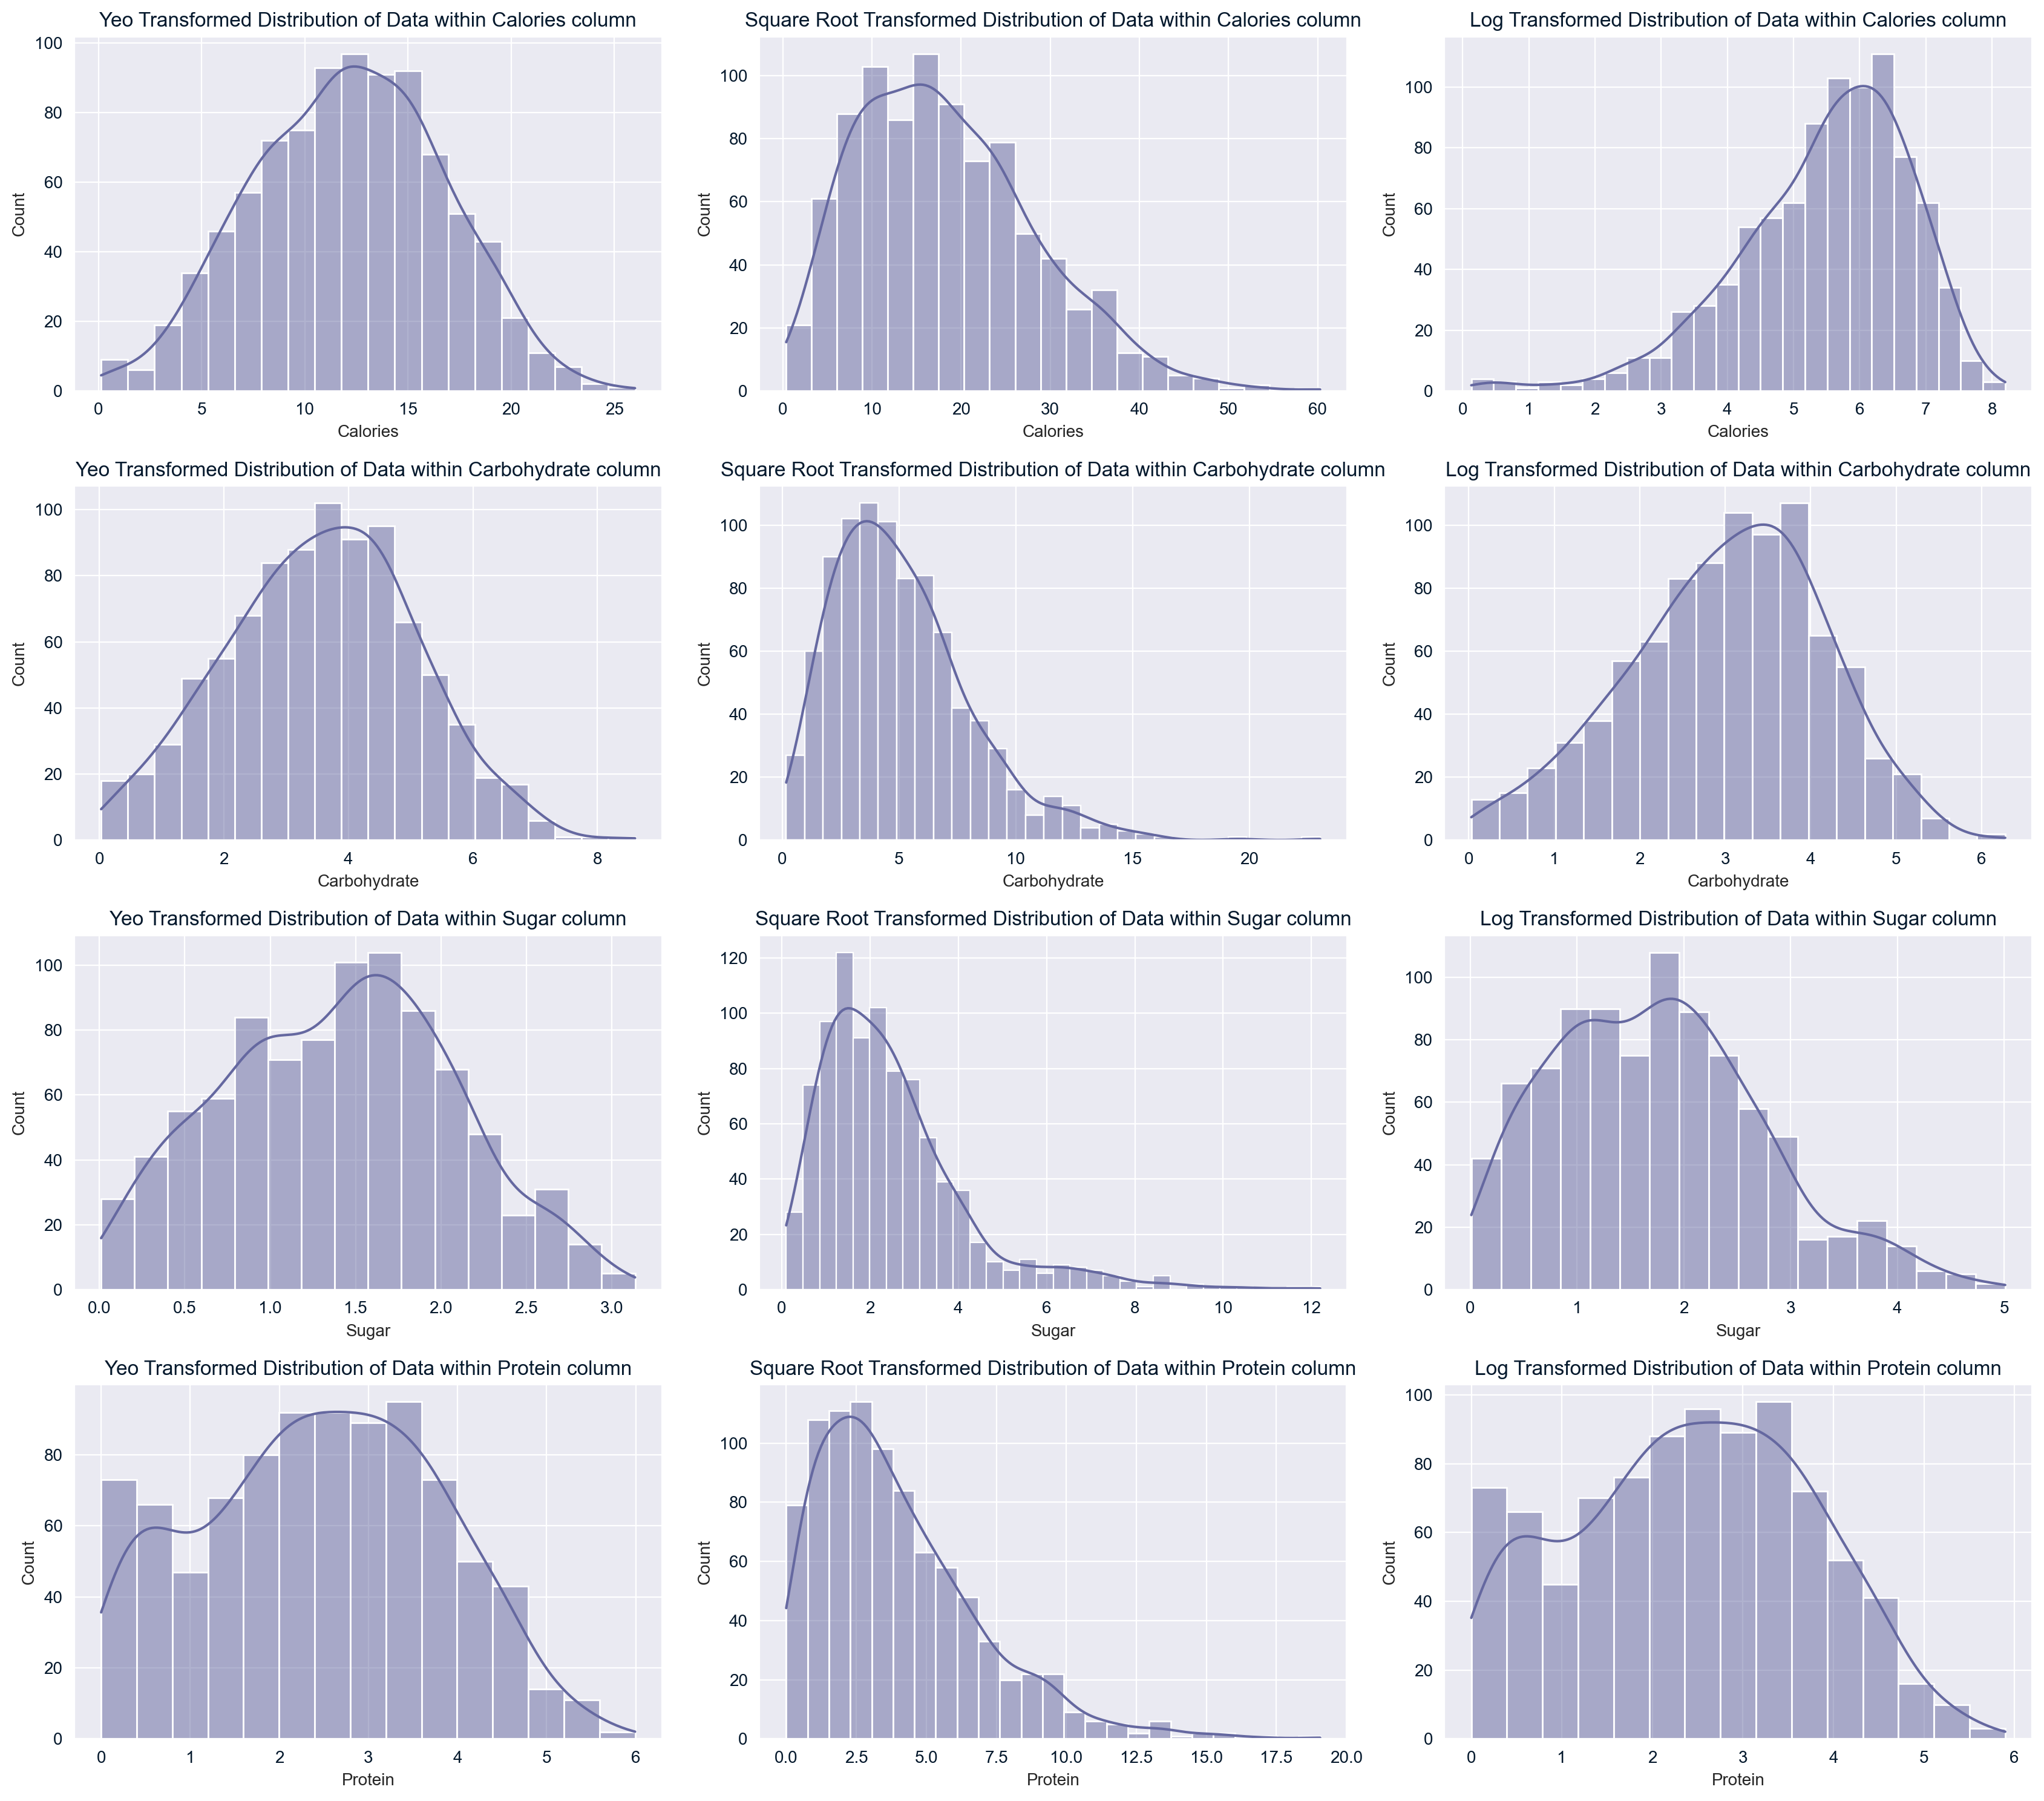

In [22]:
#import statistical transformation capability
from scipy.stats import yeojohnson
#set up copy dataframes to perform transformations over
yeo_transformed_data = recipes.copy()
sq_root_transformed_data = recipes.copy()
log_transformed_data = recipes.copy()

#iterate through to transform data
for col in float_columns:
    yeo_transformed_data[col] = yeojohnson(yeo_transformed_data[col])[0]
    sq_root_transformed_data[col] = np.sqrt(sq_root_transformed_data[col])
    log_transformed_data[col] = np.log1p(log_transformed_data[col])
    
#plot out transformed distributions to see changes
row_num = len(float_columns)
fig_trans, axes_trans = plt.subplots(row_num,3,figsize=(17,15))

#loop over columns to plot transformations
for i,col in enumerate(float_columns):
    #yeo-johnson transformation
    ax = axes_trans[i][0]
    sns.histplot(data=yeo_transformed_data,x=col,kde=True,ax=ax)
    ax.set_title(f"Yeo Transformed Distribution of Data within {col.capitalize()} column")
    ax.set_xlabel(f"{col.capitalize()}")
    #square root transformation
    ax_2 = axes_trans[i][1]
    sns.histplot(data=sq_root_transformed_data,x=col,kde=True,ax=ax_2)
    ax_2.set_title(f"Square Root Transformed Distribution of Data within {col.capitalize()} column")
    ax_2.set_xlabel(f"{col.capitalize()}")
    #log transformation
    ax_3 = axes_trans[i][2]
    sns.histplot(data=log_transformed_data,x=col,kde=True,ax=ax_3)
    ax_3.set_title(f"Log Transformed Distribution of Data within {col.capitalize()} column")
    ax_3.set_xlabel(f"{col.capitalize()}")

#sort out layout of figures
plt.tight_layout()
plt.show()

From these transformations, it seems clear that the Yeo-Johnson transformation gives us the best approximation of a normal distribution across each of the numeric columns. Transforming our numeric data in this way covers our dealings with outliers.

## Converting Categorical Variables
With our data in the form we expected it to be, we now want to change our categorical columns into a format that will be usable for modelling, through the process of creating dummy variables! We will take it one step at a time, starting with the category column.

In [23]:
#create dummy variables from category column
category_dummies = pd.get_dummies(recipes['category'],drop_first=True,dtype='int64')
category_dummies.head()

,Breakfast,Chicken,Dessert,Lunch/Snacks,Meat,One Dish Meal,Pork,Potato,Vegetable
1,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0


We have our dummy variables created now! Standard practice is to drop the first newly created column, in this case Beverages, to avoid multi-colinearity. Multi-colinearity is where one of or a combination of the newly created variables will exactly predict another variable within the dataset. In this case if the recipe had a value of 0 for Breakfast, Chicken, Dessert, Lunch/Snacks, Meat, One Dish Meal, Pork, Potato and Vegetable then it would have to have a 1 for Beverages: the data on the other variables exactly predicts the data on one variable. Avoiding this ensures that our model will be more robust in testing and training when we get to creating it, whilst retaining as much information as we can.

We will concatenate our transformed data with this dataframe of dummy variables, dropping the category column and the recipe column, as well as converting the high_traffic column into 1s and 0s now that we have performed our exploratory analysis.

In [24]:
#create usable dataframe for modelling
recipes_model = pd.concat([yeo_transformed_data,category_dummies],axis=1)

#now to drop the category and recipe columns
recipes_model.drop(['recipe','category'],axis=1,inplace=True)

#convert the high_traffic column into Boolean: 1 and 0
recipes_model['high_traffic'] = np.where(recipes_model['high_traffic']=='True',1,0)

#look at resultant dataframe
recipes_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 895 entries, 1 to 946
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   calories       895 non-null    float64
 1   carbohydrate   895 non-null    float64
 2   sugar          895 non-null    float64
 3   protein        895 non-null    float64
 4   servings       895 non-null    int64  
 5   high_traffic   895 non-null    int64  
 6   Breakfast      895 non-null    int64  
 7   Chicken        895 non-null    int64  
 8   Dessert        895 non-null    int64  
 9   Lunch/Snacks   895 non-null    int64  
 10  Meat           895 non-null    int64  
 11  One Dish Meal  895 non-null    int64  
 12  Pork           895 non-null    int64  
 13  Potato         895 non-null    int64  
 14  Vegetable      895 non-null    int64  
dtypes: float64(4), int64(11)
memory usage: 111.9 KB


We have our data in our desired form, with categorical variables encoded and the numeric variables transformed. Now we can begin to consider our modelling approaches!

### Model Choices

The baseline model that we will employ will be a logistic regression model, with a classification threshold at 50%. Some other options that we will consider are a decision tree, random forest and k-nearest neighbours models. Before we begin, we will need to import the relevant modules for our model creation, training, validation and testing.

In [25]:
#import models for model development
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

#import metrics for evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

#import data splitting functionality
from sklearn.model_selection import train_test_split

With the funcionality imported we need to split out our data into a target class, y, and a set of features, X, followed by splitting into training and testing sets. Fro training we will take 80% of the data, with the remaining 20% split for testing.

In [26]:
#define features and target, X and y
X = recipes_model.drop('high_traffic',axis=1)
y = recipes_model['high_traffic']

#split out into training
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

Now that our features are split out into their respective sets, we can define a function to evaluate the models that we create to see which performs best.

In [27]:
#function to train and predict from out model
def model_fitting_metrics(model, X_train, X_test, y_train, y_test):
    """A function to take in a model instance and data sets and return a batch of metrics based on that model's performance: accuracy, precision, recall, f1 score, confusion matrix"""
    eval_metrics = {}
    #fit our model
    model.fit(X_train,y_train)
    #predict y values
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    
    #carry out metric calculations for training
    train_model_accuracy = accuracy_score(y_train,y_pred_train)
    train_model_precision = precision_score(y_train,y_pred_train)
    train_model_recall = recall_score(y_train,y_pred_train)
    train_model_f1 = f1_score(y_train,y_pred_train)
    train_model_confusion_matrix = confusion_matrix(y_train,y_pred_train)
    #add metrics to dictionary
    eval_metrics['train'] = [train_model_accuracy,train_model_precision,train_model_recall,train_model_f1,train_model_confusion_matrix]
    
    #carry out metric calculations for testing
    test_model_accuracy = accuracy_score(y_test,y_pred_test)
    test_model_precision = precision_score(y_test,y_pred_test)
    test_model_recall = recall_score(y_test,y_pred_test)
    test_model_f1 = f1_score(y_test,y_pred_test)
    test_model_confusion_matrix = confusion_matrix(y_test,y_pred_test)
    #add metrics to dictionary
    eval_metrics['test'] = [test_model_accuracy,test_model_precision,test_model_recall,test_model_f1,test_model_confusion_matrix]
    
    #return eval_metrics for scrutiny
    return eval_metrics

#function to print out model metrics
def print_metrics(metrics,model_type):
    print(f"{model_type}\n======\nAccuracy Score: {metrics[0]}\nPrecision Score: {metrics[1]}\nRecall Score: {metrics[2]}\nF1 Score: {metrics[3]}\nConfusion Matrix:\n {metrics[4]}\n")    

With this created, lets pass through our logistic regression model and see how it performs. The main metric of concern for us is Precision - the metric telling us what percentage of our high traffic predictions are correct.

In [28]:
#Logistic Regression model
logm = LogisticRegression()
#create object for evaluation metrics
logm_metrics = model_fitting_metrics(logm,X_train,X_test,y_train,y_test)
#inspect metrics
print_metrics(logm_metrics['train'],'Logistic Regression - Train')
print_metrics(logm_metrics['test'],'Logistic Regression - Test')

Logistic Regression - Train
Accuracy Score: 0.7513966480446927
Precision Score: 0.7920560747663551
Recall Score: 0.7920560747663551
F1 Score: 0.7920560747663551
Confusion Matrix:
 [[199  89]
 [ 89 339]]

Logistic Regression - Test
Accuracy Score: 0.7486033519553073
Precision Score: 0.8297872340425532
Recall Score: 0.7289719626168224
F1 Score: 0.7761194029850745
Confusion Matrix:
 [[56 16]
 [29 78]]



In [53]:
#find coefficients of feature importance
coeff_importances = logm.coef_[0]

zipped = dict(zip(X.columns,coeff_importances))
zipped

{'calories': 0.017163704293053222,
 'carbohydrate': 0.02732005763272226,
 'sugar': -0.14380188949982206,
 'protein': 0.2531796279501135,
 'servings': 0.02862427787248653,
 'Breakfast': -0.24295231458475153,
 'Chicken': -0.07638410813484055,
 'Dessert': 1.061068536810332,
 'Lunch/Snacks': 0.7699319255488719,
 'Meat': 1.3628712734418664,
 'One Dish Meal': 1.3895539428277712,
 'Pork': 2.2516893034476015,
 'Potato': 2.9650182023789005,
 'Vegetable': 3.3547150139390594}

Our intial Logistic Regression model achieved a precision score above the threshold required by the product team of 80%: a good starting point for us. Now let's look at some of the other options for us to model.

In [29]:
#Decision Tree Classifier, setting max depth to avoid overfitting
dt = DecisionTreeClassifier(max_depth=4,random_state=42)
#object for model metrics dictionary
dt_metrics = model_fitting_metrics(dt,X_train,X_test,y_train,y_test)
#inspect metrics
print_metrics(dt_metrics['train'],'Decision Tree - Train')
print_metrics(dt_metrics['test'],'Decision Tree - Test')

Decision Tree - Train
Accuracy Score: 0.770949720670391
Precision Score: 0.7933333333333333
Recall Score: 0.8341121495327103
F1 Score: 0.8132118451025057
Confusion Matrix:
 [[195  93]
 [ 71 357]]

Decision Tree - Test
Accuracy Score: 0.7318435754189944
Precision Score: 0.7864077669902912
Recall Score: 0.7570093457943925
F1 Score: 0.7714285714285715
Confusion Matrix:
 [[50 22]
 [26 81]]



The decision tree falls below the requirements on the training data and test data, though with hyper-parameter tuning it could be a good option. Let's look at a Nearest Neighbours model.

In [30]:
#Random Forest Classifier
knn = KNeighborsClassifier()
#dictionary object
knn_metrics = model_fitting_metrics(knn,X_train,X_test,y_train,y_test)
#inspect metrics
print_metrics(knn_metrics['train'],'KNN - Train')
print_metrics(knn_metrics['test'],'KNN - Test')

KNN - Train
Accuracy Score: 0.7667597765363129
Precision Score: 0.7735849056603774
Recall Score: 0.8621495327102804
F1 Score: 0.8154696132596686
Confusion Matrix:
 [[180 108]
 [ 59 369]]

KNN - Test
Accuracy Score: 0.6145251396648045
Precision Score: 0.6826923076923077
Recall Score: 0.6635514018691588
F1 Score: 0.6729857819905213
Confusion Matrix:
 [[39 33]
 [36 71]]



The nearest neighbour model is a notably worse performer than either the Decision Tree or Logistic Regression models, with a precision score below 70%. Two models left to check, first a Random Forest model.

In [31]:
#Random Forest Classifier
rf = RandomForestClassifier(max_depth=4,random_state=42)
#dictionary object
rf_metrics = model_fitting_metrics(rf,X_train,X_test,y_train,y_test)
#inspect metrics
print_metrics(rf_metrics['train'],'Random Forest - Train')
print_metrics(rf_metrics['test'],'Random Forest - Test')

Random Forest - Train
Accuracy Score: 0.7569832402234636
Precision Score: 0.7351851851851852
Recall Score: 0.927570093457944
F1 Score: 0.8202479338842974
Confusion Matrix:
 [[145 143]
 [ 31 397]]

Random Forest - Test
Accuracy Score: 0.7374301675977654
Precision Score: 0.7459016393442623
Recall Score: 0.8504672897196262
F1 Score: 0.794759825327511
Confusion Matrix:
 [[41 31]
 [16 91]]



Again, a performance well below that of the Logistic Regression model that we observed previously. Similar to the Decision Tree, this seems suitable for some hyper parameter tuning. Finally, a Gradient Boosting Classification model.

In [32]:
#Gradient Boosting Classifier
gb = GradientBoostingClassifier(random_state=42)
#evaluate model
gb_metrics = model_fitting_metrics(gb,X_train,X_test,y_train,y_test)
#inspect metrics
print_metrics(gb_metrics['train'],'Gradient Boosting - Train')
print_metrics(gb_metrics['test'],'Gradient Boosting - Test')

Gradient Boosting - Train
Accuracy Score: 0.8533519553072626
Precision Score: 0.8764568764568764
Recall Score: 0.8785046728971962
F1 Score: 0.8774795799299883
Confusion Matrix:
 [[235  53]
 [ 52 376]]

Gradient Boosting - Test
Accuracy Score: 0.7150837988826816
Precision Score: 0.7916666666666666
Recall Score: 0.7102803738317757
F1 Score: 0.7487684729064038
Confusion Matrix:
 [[52 20]
 [31 76]]



Clearly it is overfitting to the training data, with a drop off of precision score from training to testing. Now we can begin to optimise these potential models to see how far we can push performance without overfitting, or if indeed we can push performance further.

### Gradient Boosting: Hyperparameter Tuning

In [33]:
#import GridSearchCV for hyperparameter tuning
from sklearn.model_selection import GridSearchCV
#set up grid search object to test through gradient boosting classifier parameters
gscv_gb = GridSearchCV(estimator = GradientBoostingClassifier(random_state=42),
                    param_grid={'n_estimators':[100,500,1000],
                                'min_samples_leaf':[1,2,3,4,5],
                                'max_depth':[1,2,3,4],
                                'min_weight_fraction_leaf':[0.05,0.1,0.15,0.2]},
                    cv=4,
                    scoring='precision',
                    n_jobs=-1)

#fit to training data
gscv_gb.fit(X_train,y_train)
#predict from best estimator
y_pred_gb = gscv_gb.predict(X_test)
#pick out best parameters and score, plus extract best estimator
print(gscv_gb.best_params_)
print(precision_score(y_test,y_pred_gb))

{'max_depth': 1, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0.05, 'n_estimators': 100}
0.8295454545454546


### Decision Tree: Hyperparameter Tuning

In [34]:
#set up grid search object to test through decision tree classifier parameters
gscv_dt = GridSearchCV(estimator = DecisionTreeClassifier(random_state=42),
                    param_grid={'min_samples_split':[2,4,6,8],
                                'min_samples_leaf':[1,2,3,4,5],
                                'max_depth':[1,2,3,4,5,6,7],
                                'min_weight_fraction_leaf':[0.05,0.1,0.15,0.2]},
                    cv=4,
                    scoring='precision',
                    n_jobs=-1)

#fit to training data
gscv_dt.fit(X_train,y_train)
#predict from best estimator
y_pred_dt = gscv_dt.predict(X_test)
#pick out best parameters and score, plus extract best estimator
print(gscv_dt.best_params_)
print(precision_score(y_test,y_pred_dt))

{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.05}
0.8117647058823529


### Random Forest: Hyperparameter Tuning

In [35]:
#set up grid search object to test through random forest classifier parameters
gscv_rf = GridSearchCV(estimator = RandomForestClassifier(random_state=42),
                    param_grid={'n_estimators':[100,500,1000],
                                'min_samples_leaf':[1,2,3,4,5],
                                'max_depth':[1,2,3,4],
                                'min_weight_fraction_leaf':[0.05,0.1,0.15,0.2]},
                    cv=4,
                    scoring='precision',
                    n_jobs=-1)

#fit to training data
gscv_rf.fit(X_train,y_train)
#predict from best estimator
y_pred_rf = gscv_rf.predict(X_test)
#pick out best parameters and score, plus extract best estimator
print(gscv_rf.best_params_)
print(precision_score(y_test,y_pred_rf))

{'max_depth': 4, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0.05, 'n_estimators': 1000}
0.7521367521367521


### KNN: Hyperparameter Tuning

In [36]:
#set up grid search object to test through gradient boosting classifier parameters
gscv_knn = GridSearchCV(estimator = KNeighborsClassifier(),
                    param_grid={'n_neighbors':[2,4,6,8,10],
                                'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
                                'leaf_size':[5,10,15,20,25,30,35,40],
                                'weights':['uniform','distance']},
                    cv=4,
                    scoring='precision',
                    n_jobs=-1)

#fit to training data
gscv_knn.fit(X_train,y_train)
#predict from best estimator
y_pred_knn = gscv_knn.predict(X_test)
#pick out best parameters and score, plus extract best estimator
print(gscv_knn.best_params_)
print(precision_score(y_test,y_pred_knn))

{'algorithm': 'auto', 'leaf_size': 5, 'n_neighbors': 4, 'weights': 'uniform'}
0.7101449275362319


Hyperparameter tuning in this instance has provided us with a viable model for the product team's requirements: the Decision Tree.

# Model Evaluation

The main metric that the product team is concerned with for their predictions is Precision: the fraction of positive responses correctly identified by a model from the total number of positive responses identified by the model. In other words, the number of True Positive (TP) predictions divided by the sum of True Positive and Flse Positive (FP) predictions.

$$Precision = \frac{TP}{TP+FP}$$

Let's have a look at the precision scores for each of the models that we have tested.

In [37]:
#create dictionary containing all precision scores
model_precision_f1_scores = {'Model':['Logistic Regression',
                                   'K Nearest Neighbors',
                                   'Decision Tree',
                                   'Random Forest',
                                   'Gradient Boosting',
                                   'Tuned Decision Tree',
                                   'Tuned Gradient Boosting',
                                   'Tuned Random Forest',
                                   'Tuned K Nearest Neighbors'],
                          'Precision Score':[logm_metrics['test'][1],
                                             knn_metrics['test'][1],
                                             dt_metrics['test'][1],
                                             rf_metrics['test'][1],
                                             gb_metrics['test'][1],
                                             precision_score(y_test,y_pred_dt),
                                             precision_score(y_test,y_pred_gb),
                                             precision_score(y_test,y_pred_rf),
                                             precision_score(y_test,y_pred_knn)],
                          'F1 Score':[logm_metrics['test'][3],
                                      knn_metrics['test'][3],
                                      dt_metrics['test'][3],
                                      rf_metrics['test'][3],
                                      gb_metrics['test'][3],
                                      f1_score(y_test,y_pred_dt),
                                      f1_score(y_test,y_pred_gb),
                                      f1_score(y_test,y_pred_rf),
                                      f1_score(y_test,y_pred_knn)]
}

#read in dictionary
scoring_df = pd.DataFrame(model_precision_f1_scores)
#set index to models
scoring_df.index = scoring_df['Model']
#drop model column for neatness
scoring_df.drop(['Model'],axis=1,inplace=True)
#sort values to show highest precision score
sorted_scoring = scoring_df.sort_values(by='Precision Score',ascending=False)
#round our values for cleanliness
sorted_scoring['Precision Score'] = np.round(sorted_scoring['Precision Score'],4)*100
sorted_scoring['F1 Score'] = np.round(sorted_scoring['F1 Score'],4)*100
#print out scoring dataframe
print(sorted_scoring)

                           Precision Score  F1 Score
Model                                               
Logistic Regression                  82.98     77.61
Tuned Gradient Boosting              82.95     74.87
Tuned Decision Tree                  81.18     71.88
Gradient Boosting                    79.17     74.88
Decision Tree                        78.64     77.14
Tuned Random Forest                  75.21     78.57
Random Forest                        74.59     79.48
Tuned K Nearest Neighbors            71.01     55.68
K Nearest Neighbors                  68.27     67.30


Out of the 9 models tested, including ones specifically tuned to try to maximise performance, the best three models for the requirements of the product department are the tuned Gradient Boosting Classifier, the tuned Decision Tree and the baseline Logistic Regression models! The Decision Tree model has a precision score of 81.2% but it is beaten, by both the Gradient Boosting model and the Logistic Regression model, with precision scores of 82.95% and 82.98%. Virtually nothing separates the logistic Regression and Tuned Gradient Boosting models!

Interestingly if we look at F1 scores, a weighted average of precision and recall, the three best performers are the Tuned Random Forest, the initial Random Forest and our baseline model.

For the purposes of our investigation, Logistic Regression or the Tuned Gradient Boosting model would do but for ease of interpretability and explainability the **Logistic Regression model would be favoured!**

# Business Requirements

As previously stated, the product team are looking for a model that has high precision, being able to correctly identify at least 80% of recipes that, when displayed on the home page, will drive high traffic to the rest of the Tasty Bytes website. To further investigate this, we can look at the ratio between True Positives (recipes correctly identified as high traffic) and False Positives (recipes incorrectly identified as high traffic) to further check how efficient our models were at identifying correct incidents of high traffic recipes. This ratio, which we can term High Traffic Conversion Rate, can act as our Key Performance Indicator (KPI) alongside the precision scores we have seen in our model evaluation. We are looking for a value above 4 in this KPI: a 4 to 1 ratio converts to an 80% correct identification for our models.

In [38]:
#define function to evaluate business KPI
def high_traffic_conversion_rate(metrics, model_name):
    #try for metrics calculated previously
    try:
        confusion_matrix = metrics['test'][4]
        print(f'High Traffic Conversion Rate - {model_name}: {round(confusion_matrix[1][1]/confusion_matrix[0][1],2)}')
    #allow for passing through of confusion matrices directly
    except:
        print(f'High Traffic Conversion Rate - {model_name}: {round(metrics[1][1]/metrics[0][1],2)}')

In [39]:
#look at model results
#list of model metrics to compare
model_metrics = [logm_metrics,
                 knn_metrics,
                 dt_metrics,
                 rf_metrics,
                 gb_metrics,
                 confusion_matrix(y_test,y_pred_dt),
                 confusion_matrix(y_test,y_pred_gb),
                 confusion_matrix(y_test,y_pred_rf),
                 confusion_matrix(y_test,y_pred_knn)]

#list of model names
model_names = ['Logistic Regression',
               'K Nearest Neighbors',
               'Decision Tree',
               'Random Forest',
               'Gradient Boosting',
               'Tuned Decision Tree',
               'Tuned Gradient Boosting',
               'Tuned Random Forest',
               'Tuned K Nearest Neighbors']

#loop through metrics and names to produce KPIs for each model
for metrics,model_name in zip(model_metrics,model_names):
    high_traffic_conversion_rate(metrics,model_name)

High Traffic Conversion Rate - Logistic Regression: 4.88
High Traffic Conversion Rate - K Nearest Neighbors: 2.15
High Traffic Conversion Rate - Decision Tree: 3.68
High Traffic Conversion Rate - Random Forest: 2.94
High Traffic Conversion Rate - Gradient Boosting: 3.8
High Traffic Conversion Rate - Tuned Decision Tree: 4.31
High Traffic Conversion Rate - Tuned Gradient Boosting: 4.87
High Traffic Conversion Rate - Tuned Random Forest: 3.03
High Traffic Conversion Rate - Tuned K Nearest Neighbors: 2.45


It's a very close call between the Tuned Gradient Boosting Classifier and the Logistic Regression models: 4.87 to 4.88. Either of these would be a good fit for the demands of the product team, but I would recommend the Logistic Regression model for the simplicity of deployment and increased ease of explainability to stakeholders.

# Summary/Recommendations

In summary, we have taken the provided data on Tasty Bytes recipes given to us by the product team which we cleaned and validated to carry out some initial exploratory analysis. This initial analysis highlighted some interesting connections: whilst the highest number of recipes were chicken based, chicken recipes had the third lowest percentage of recipes driving high traffic to the main Tasty Bytes website. There was a wide range of values across the Calories, Carbohydrate, Protein and Sugar columns that didn't seem to correlate to higher traffic from the home page, with the exception of a small, weak correlation between protein and driving high traffic. After the initial analysis, further data preprocessing was required to get the data in a form that allowed for modelling. Five different types of model were explored; Logistic Regression as a baseline, Decision Tree, Random Forest, Gradient Boosting and a K Nearest Neighbors model. From this selection, tuning was carried out to try and maximise the performance of each model if possible.

In the end, the baseline Logistic Regression was the best performer, with a precision score of 82.98% just beating out the tuned Gradient Boosting Classifier (82.95%). The Key Performance Indicator of High Traffic Conversion Rate supports this case, with the Logistic Regression model (4.88) again beating out the Tuned Gradient Boosting Classifier (4.87). Logistic Regression is the model that I would recommend to the product team based on these factors.

Next steps from this project would be to gather more recipe data to train and test a wider selection of models on, potentially using image data of the recipes in conjunction with numerical features to train a Convolutional Neural Network to classify which recipes are popular within the Tasty Bytes catalogue. The low volume of data available for testing each model would be another consideration for the product team, as further data within each training and testing set would make for a more reliable and reproducible modelling outcome across the board.

A recommendation for the product team moving forwards would be to productionise the most successful model in this trial so that new recipes can be passed through and the probability of driving high traffic to the rest of the Tasty Bytes website can be established for each new recipe. Alongside this, it would be worth experimenting with different displayed forms of a recipe on the homepage in an A/B test to determine if there are any improvements or tweaks that can be made to drive further traffic to the main Tasty Bytes website.